<a href="https://colab.research.google.com/github/royssentongo/ReneWind_Model_to_reduce_overall_maintainace_costs_of_Generator_Turbines/blob/main/MT_Project_Solution_Notebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==2.2.2 numpy==1.25.2 matplotlib==3.8.1 seaborn==0.13.1 scikit-learn==1.3.1 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [ ]:
# Importing necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For splitting the data
from sklearn.model_selection import train_test_split

# For building Logistic Regressor
from sklearn.linear_model import LogisticRegression

# For building Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# For developing emsemble Classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

# For developing XGBoost classifier
from xgboost import XGBClassifier

# For tuning the classifier models
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# For Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,StratifiedKFold

# For measuring performance
from sklearn import metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score
                             ,confusion_matrix,classification_report,roc_auc_score, roc_curve)

# For Oversampling and Undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For imputing missing values
from sklearn.impute import SimpleImputer

# To create a pipeline and personalizing them
from imblearn.pipeline import Pipeline, make_pipeline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
Train_data = pd.read_csv('/content/drive/MyDrive/Project 2/Model Tuning Project/Train.csv')
Test_data = pd.read_csv('/content/drive/MyDrive/Project 2/Model Tuning Project/Test.csv')

# Merging Train_data and Test_data into one DataFrame for purposes of EDA
df = pd.concat([Train_data, Test_data], axis=0, ignore_index=True)

# Creating a copy of the dataframe
data = df.copy()

## Data Overview

- Observations
- Sanity checks

#### Viewing the first and last five rows

In [ ]:
# Viewing the first 5 rows
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

In [ ]:
# Viewing the last 5 rows
data.tail()

V1        V2        V3        V4        V5        V6        V7  \
24995 -5.120451  1.634804  1.251259  4.035944  3.291204 -2.932230 -1.328662   
24996 -5.172498  1.171653  1.579105  1.219922  2.529627 -0.668648 -2.618321   
24997 -1.114136 -0.403576 -1.764875 -5.879475  3.571558  3.710802 -2.482952   
24998 -1.703241  0.614650  6.220503 -0.104132  0.955916 -3.278706 -1.633855   
24999 -0.603701  0.959550 -0.720995  8.229574 -1.815610 -2.275547 -2.574524   

             V8        V9       V10  ...       V32       V33        V34  \
24995  1.754066 -2.984586  1.248633  ...  9.979118  0.063438   0.217281   
24996 -2.000545  0.633791 -0.578938  ...  4.423900  2.603811  -2.152170   
24997 -0.307614 -0.921945 -2.999141  ...  3.791778  7.481506 -10.061396   
24998 -0.103936  1.388152 -1.065622  ... -4.100352 -5.949325   0.550372   
24999 -1.041479  4.129645 -2.731288  ...  2.369776 -1.062408   0.790772   

            V35       V36       V37       V38       V39       V40  Target  
24995  3.036388  2.109323 -0.557433  1.938718  0.512674 -2.694194       0  
24996  0.917401  2.156586  0.466963  0.470120  2.196756 -2.376515       0  
24997 -0.387166  1.848509  1.818248 -1.245633 -1.260876  7.474682       0  
24998 -1.573640  6.823936  2.139307 -4.036164  3.436051  0.579249       0  
24999  4.951955 -7.440825 -0.069506 -0.918083 -2.291154 -5.362891       0  

[5 rows x 41 columns]

Observation:
The data is as expected. It has a Target variable in the last column and Predictor columns from V1 to V40.

#### Viewing the number of columns and rows in the data

In [ ]:
# Viewing the shape of the data.
data.shape

(25000, 41)

There are 41 columns and 25,000 rows in the data. This is as expected.

#### Viewing the data types for the columns

In [ ]:
# Viewing the data types and other information of the columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      24977 non-null  float64
 1   V2      24976 non-null  float64
 2   V3      25000 non-null  float64
 3   V4      25000 non-null  float64
 4   V5      25000 non-null  float64
 5   V6      25000 non-null  float64
 6   V7      25000 non-null  float64
 7   V8      25000 non-null  float64
 8   V9      25000 non-null  float64
 9   V10     25000 non-null  float64
 10  V11     25000 non-null  float64
 11  V12     25000 non-null  float64
 12  V13     25000 non-null  float64
 13  V14     25000 non-null  float64
 14  V15     25000 non-null  float64
 15  V16     25000 non-null  float64
 16  V17     25000 non-null  float64
 17  V18     25000 non-null  float64
 18  V19     25000 non-null  float64
 19  V20     25000 non-null  float64
 20  V21     25000 non-null  float64
 21  V22     25000 non-null  float64
 22

Observations:
* 39 of the 41 columns have no missing values.

* Columns V1 and V2 have missing values

* There are 40 columns with Float numbers and 1 column with Integer values. This indicates that none of the columns has junk entries of object type.

* The file uses a memory space of 7.8MB

Insights:
* Need to check and treat for missing values

#### Checking for missing values

In [ ]:
# Checking for missing values
data.isnull().sum()

V1        23
V2        24
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

There are 23 missing values in column V1 and 24 in column V2.

#### Checking for duplicates

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

There are no duplicate observations in the data frame

#### Checking for the unique values in each column

In [ ]:
# Checking for number of unique values in each column
data.nunique()

V1        24977
V2        24976
V3        25000
V4        25000
V5        25000
V6        25000
V7        25000
V8        25000
V9        25000
V10       25000
V11       25000
V12       25000
V13       25000
V14       25000
V15       25000
V16       25000
V17       25000
V18       25000
V19       25000
V20       25000
V21       25000
V22       25000
V23       25000
V24       25000
V25       25000
V26       25000
V27       25000
V28       25000
V29       25000
V30       25000
V31       25000
V32       25000
V33       25000
V34       25000
V35       25000
V36       25000
V37       25000
V38       25000
V39       25000
V40       25000
Target        2
dtype: int64

Observation:

All the Predictor columns have unique values in all their observations. This is probably due to the ciphered nature of the data.

Insight:

Need to consider using Dimensionality Reduction to improve model efficiency and Decision Trees to capture the complex relationship in the data.

#### Data Summary

In [ ]:
# Summary for the data
data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      24977.0 -0.273121  3.446501 -12.381696 -2.738531 -0.749797  1.838215   
V2      24976.0  0.431931  3.148527 -12.319951 -1.642559  0.464706  2.527319   
V3      25000.0  2.498117  3.376625 -10.708139  0.226105  2.256621  4.570447   
V4      25000.0 -0.076310  3.428030 -15.082052 -2.338280 -0.137410  2.135586   
V5      25000.0 -0.059025  2.106000  -8.603361 -1.548581 -0.107352  1.340579   
V6      25000.0 -1.004782  2.033960 -10.227147 -2.351804 -1.006251  0.365115   
V7      25000.0 -0.885044  1.763109  -8.124230 -2.035858 -0.920190  0.222579   
V8      25000.0 -0.553475  3.302968 -15.657561 -2.642665 -0.382091  1.721018   
V9      25000.0 -0.007422  2.163327  -8.596313 -1.485926 -0.070398  1.420234   
V10     25000.0 -0.006693  2.183726  -9.853957 -1.400021  0.110723  1.483866   
V11     25000.0 -1.918038  3.122172 -14.832058 -3.945890 -1.944540  0.102854   
V12     25000.0  1.599143  2.925822 -12.948007 -0.408998  1.502393  3.570925   
V13     25000.0  1.588880  2.876298 -13.228247 -0.208349  1.652288  3.460339   
V14     25000.0 -0.944725  1.792426  -7.813929 -2.159781 -0.946795  0.270961   
V15     25000.0 -2.422429  3.361377 -16.416606 -4.432551 -2.390213 -0.376356   
V16     25000.0 -2.943880  4.230368 -20.985779 -5.639162 -2.700040 -0.115004   
V17     25000.0 -0.128153  3.343630 -14.091184 -2.217008 -0.007411  2.075780   
V18     25000.0  1.190599  2.591052 -12.214016 -0.404954  0.882952  2.578819   
V19     25000.0  1.187544  3.394428 -14.169635 -1.045095  1.281696  3.499366   
V20     25000.0  0.046572  3.667234 -13.922659 -2.413293  0.064728  2.517517   
V21     25000.0 -3.621881  3.569714 -17.956231 -5.933420 -3.563224 -1.278000   
V22     25000.0  0.953860  1.649298 -10.122095 -0.103713  0.976710  2.026237   
V23     25000.0 -0.377329  4.036824 -14.866128 -3.112878 -0.267060  2.442971   
V24     25000.0  1.125279  3.923323 -16.387147 -1.497698  0.958284  3.544675   
V25     25000.0  0.010498  2.015558  -8.228266 -1.352614  0.036082  1.402690   
V26     25000.0  1.868480  3.428152 -11.834271 -0.322190  1.943616  4.136977   
V27     25000.0 -0.600410  4.375666 -14.904939 -3.653682 -0.879108  2.208137   
V28     25000.0 -0.880110  1.919381  -9.269489 -2.168125 -0.898860  0.384828   
V29     25000.0 -1.007661  2.678917 -12.579469 -2.799879 -1.208240  0.608942   
V30     25000.0 -0.036167  3.009096 -14.796047 -1.895801  0.165476  2.014656   
V31     25000.0  0.483236  3.458316 -13.722760 -1.818319  0.489555  2.739329   
V32     25000.0  0.289553  5.517512 -19.876502 -3.444129  0.025922  3.759037   
V33     25000.0  0.023837  3.568291 -16.898353 -2.260302 -0.083879  2.224481   
V34     25000.0 -0.448694  3.180361 -17.985094 -2.110809 -0.238079  1.443841   
V35     25000.0  2.225937  2.939321 -15.349803  0.334812  2.103187  4.056822   
V36     25000.0  1.530816  3.795756 -14.833178 -0.929834  1.586291  4.011064   
V37     25000.0  0.013639  1.787566  -5.478350 -1.252857 -0.122369  1.186442   
V38     25000.0 -0.356352  3.952311 -17.375002 -2.987116 -0.333115  2.283132   
V39     25000.0  0.900282  1.745877  -6.438880 -0.259414  0.926280  2.071508   
V40     25000.0 -0.886985  3.005419 -11.023935 -2.950211 -0.940870  1.111955   
Target  25000.0  0.055680  0.229307   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      14.079073  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.850720  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.734112  
V15     12.246455  
V16     13.975843  
V17     19.776592  
V18     13.642235  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.505291  
V23     14.458734  
V24     17.806035  
V25      8.223389  
V26     17.528193  
V27     17.560404  
V28      7.415659  
V29     14.039466  
V30     12.505812  
V31     17.255090  
V32     2

Observations:
* More than 75% of the Target variable is 0 i.e. No Failure which signifies an imbalanced data set thus a need for Over Sampling or Under Sampling.

* All the predictor variables have entries in the range of -21 and 26.6

* 22 predictor variable have negative mean values. The rest are positive means.

* There is not predictor variable whose median is equal to the mean. This means that none is normally distributed and a likely presence of skewed data.

* the mean and median of V39, V38, V36, V31, V28, V22, V14, V11 and V8 are very close suggesting increased Normality.

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(8, 4), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

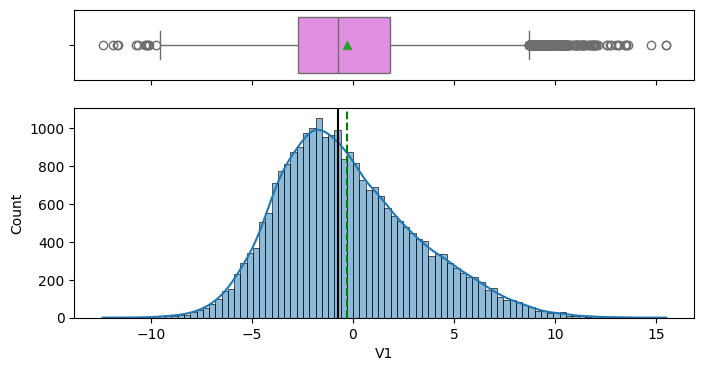

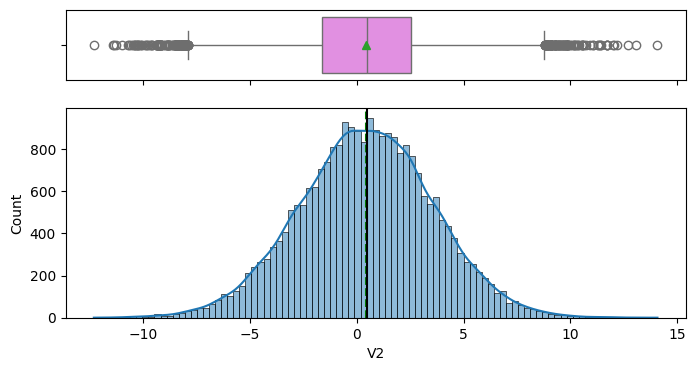

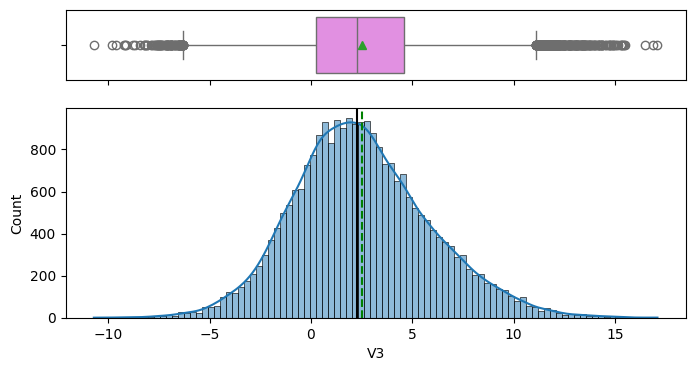

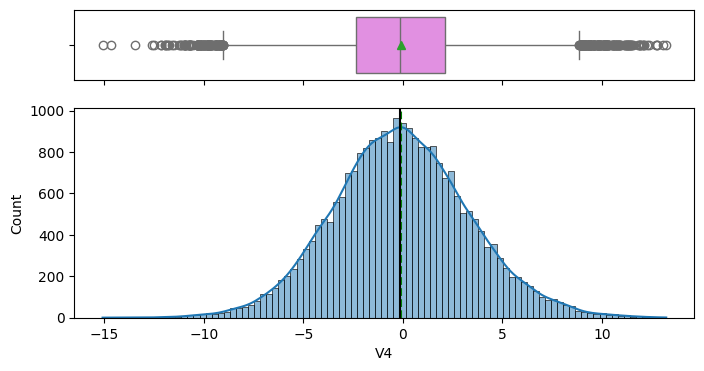

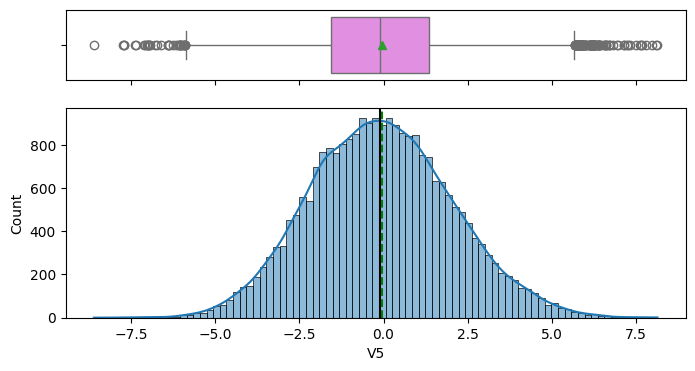

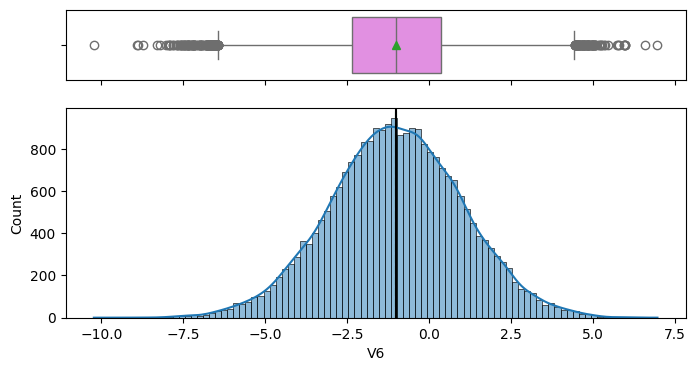

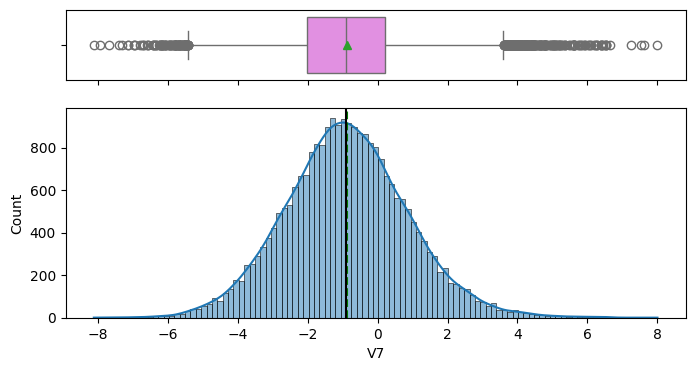

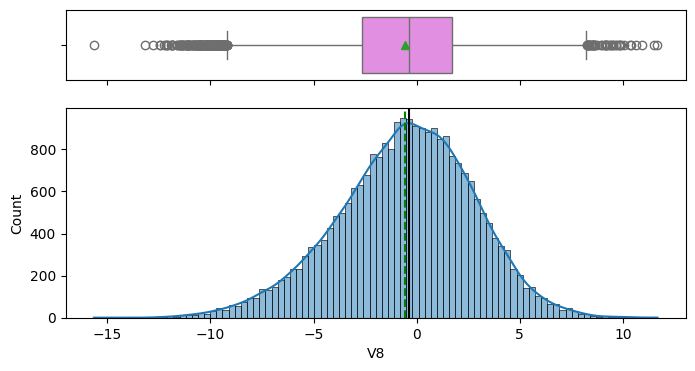

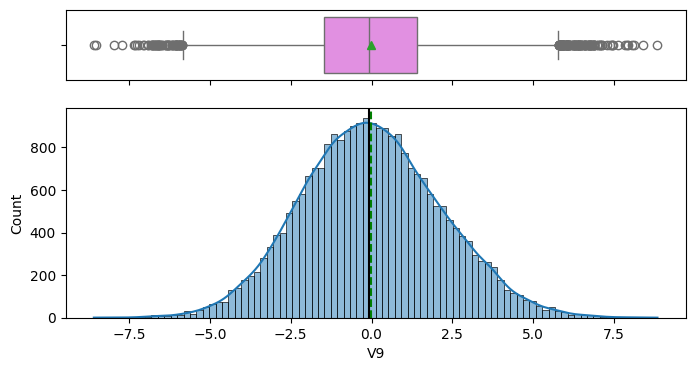

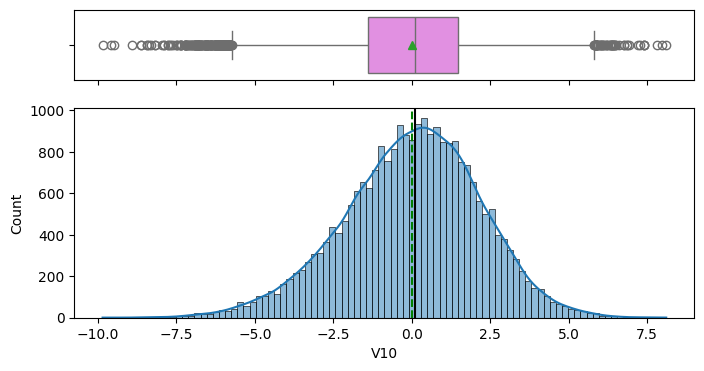

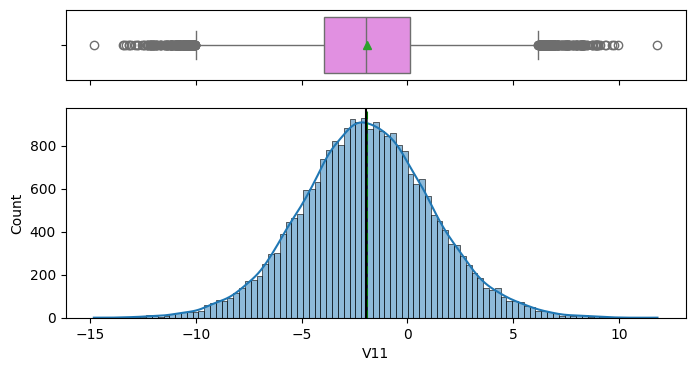

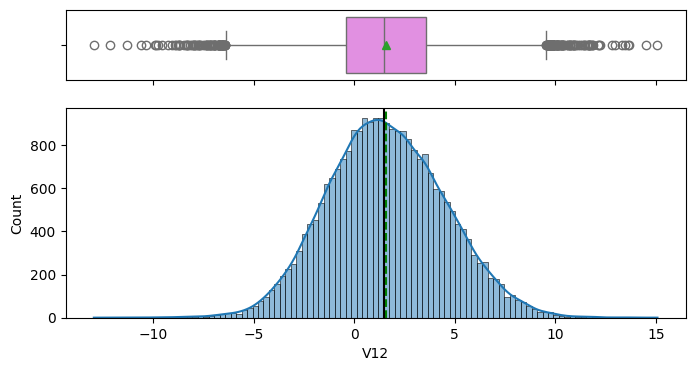

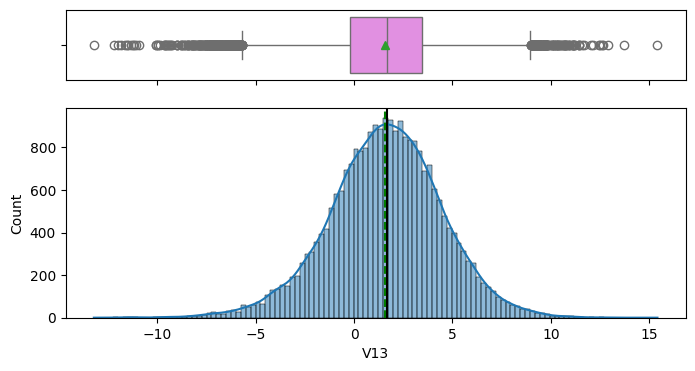

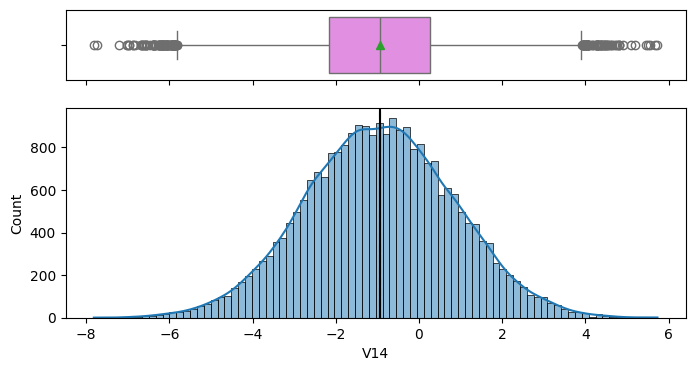

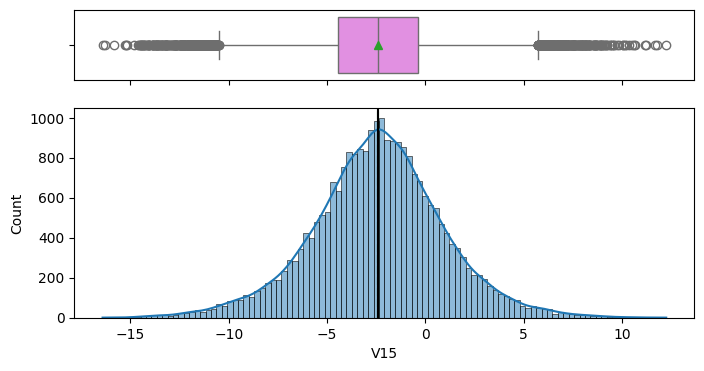

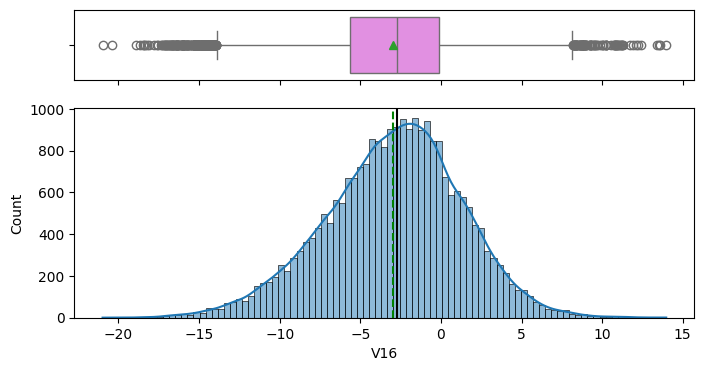

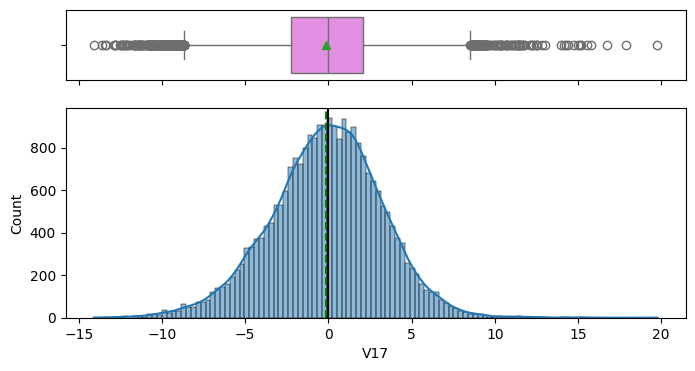

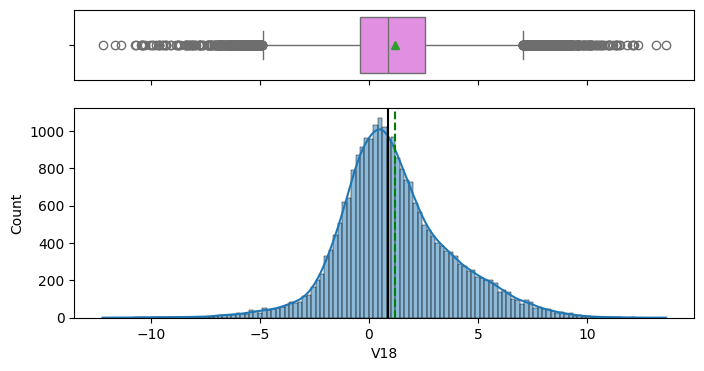

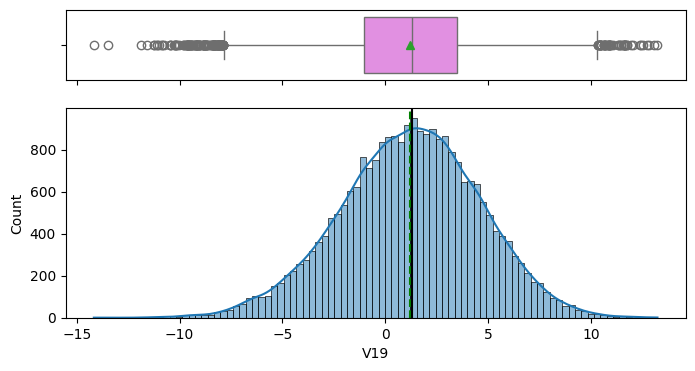

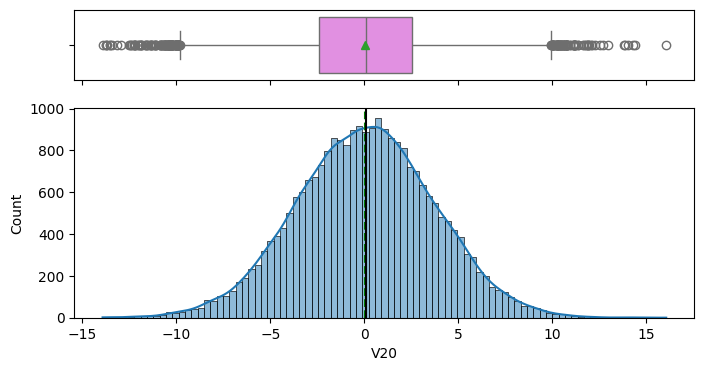

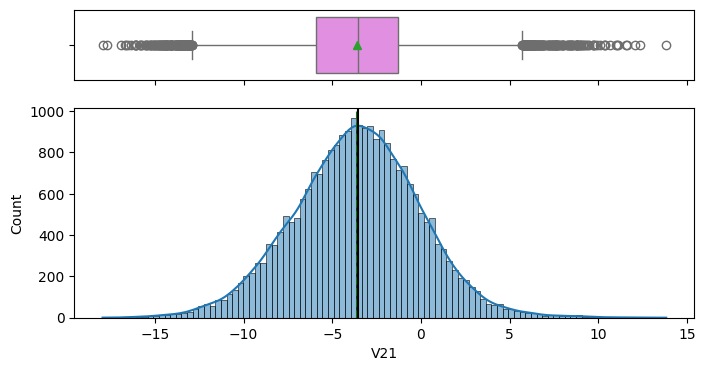

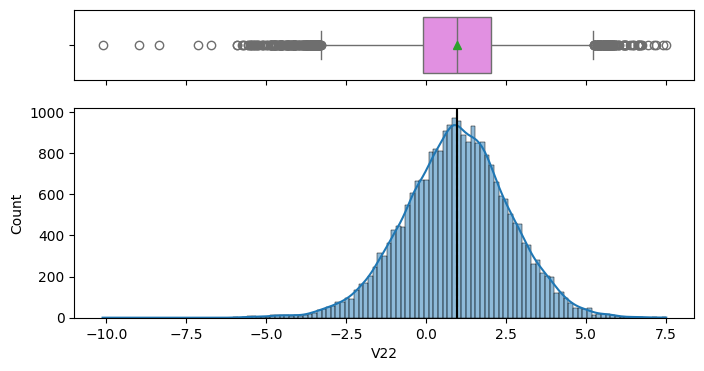

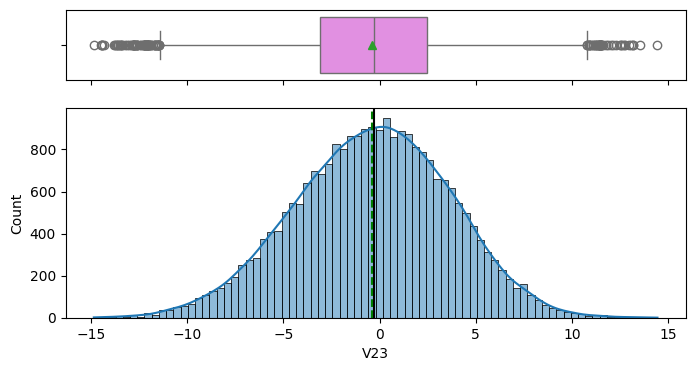

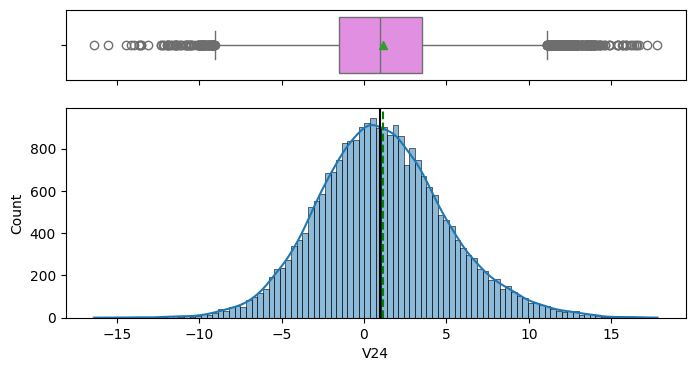

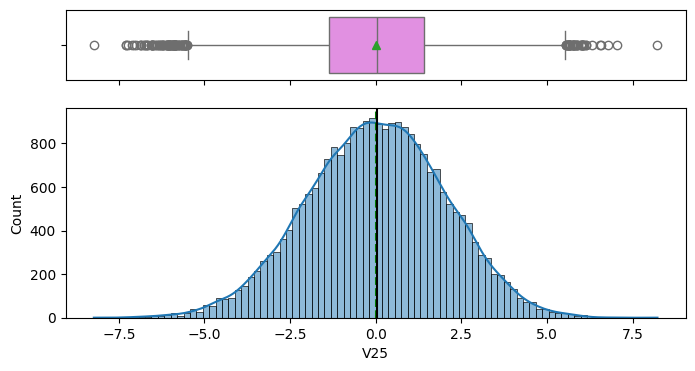

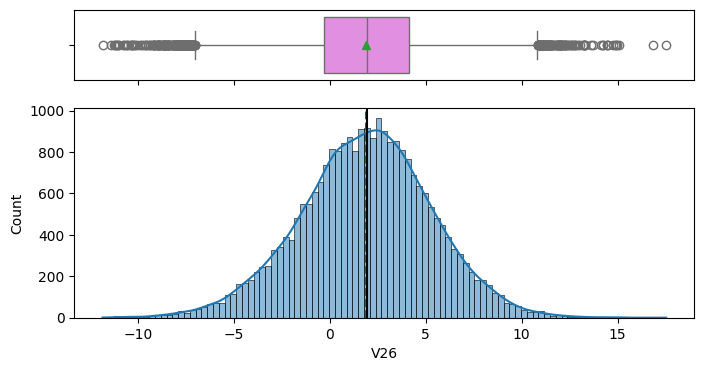

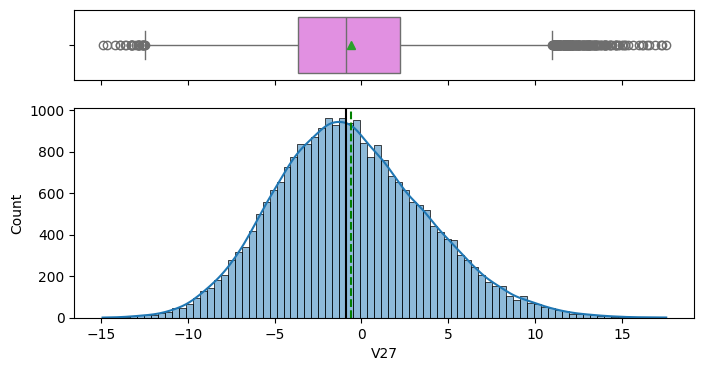

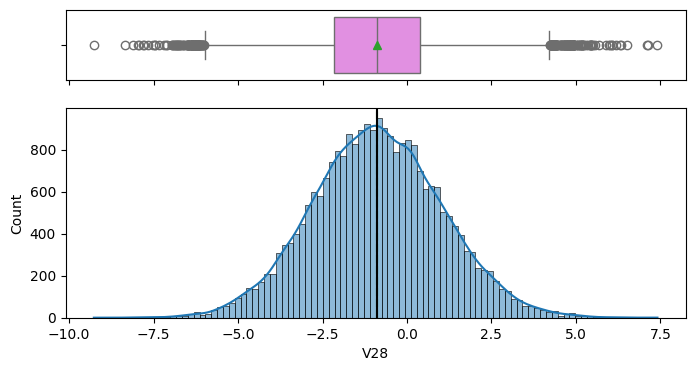

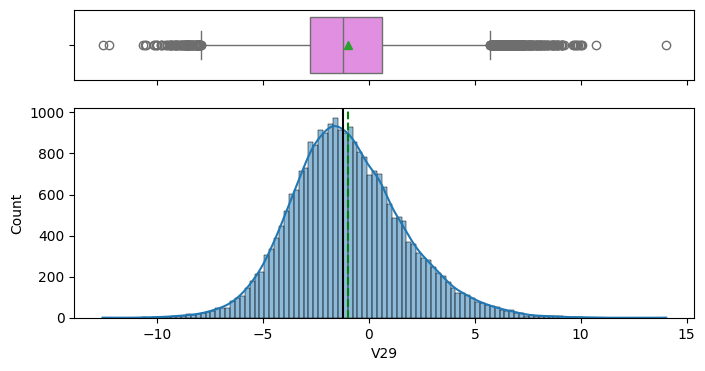

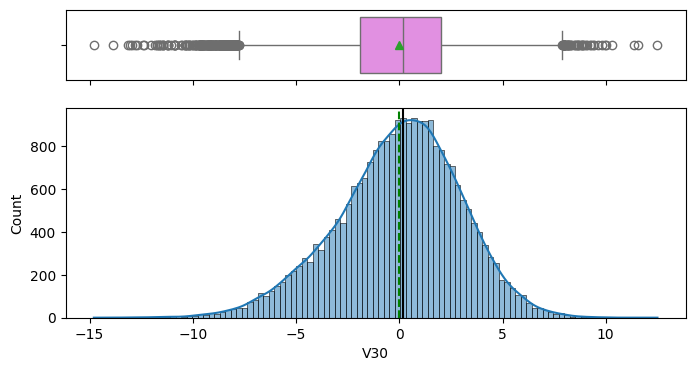

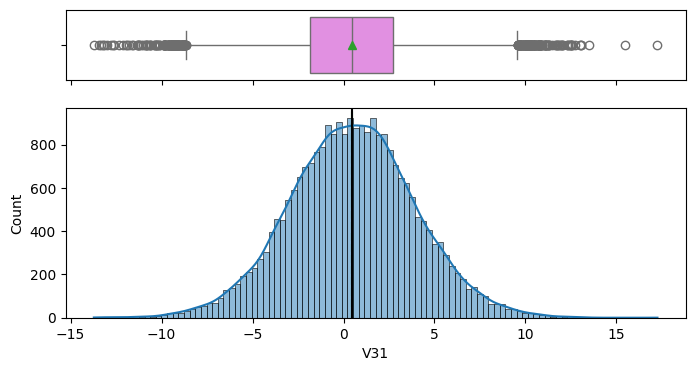

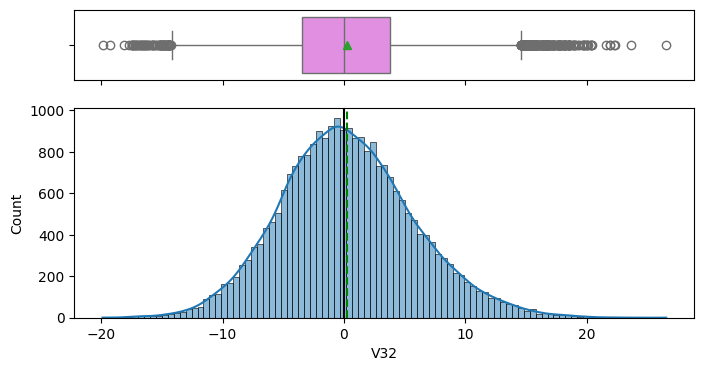

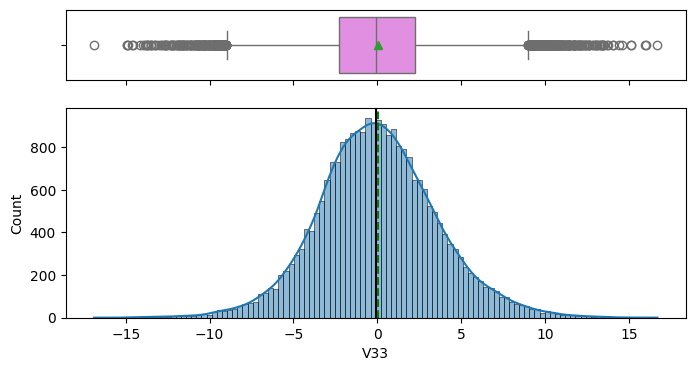

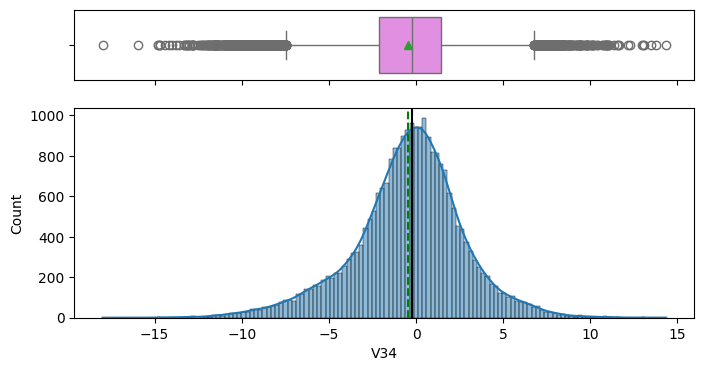

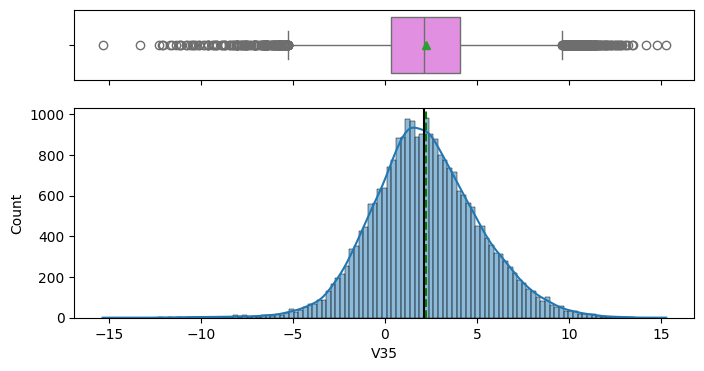

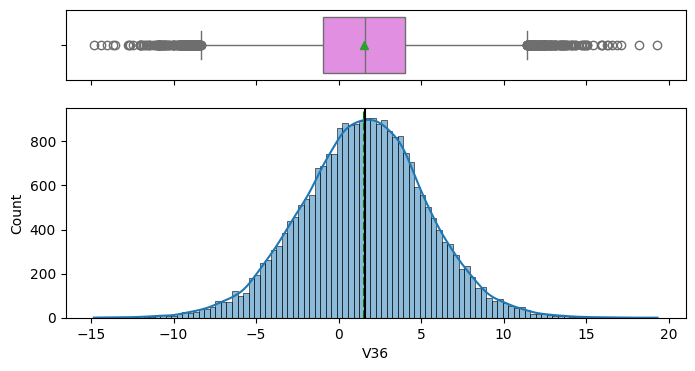

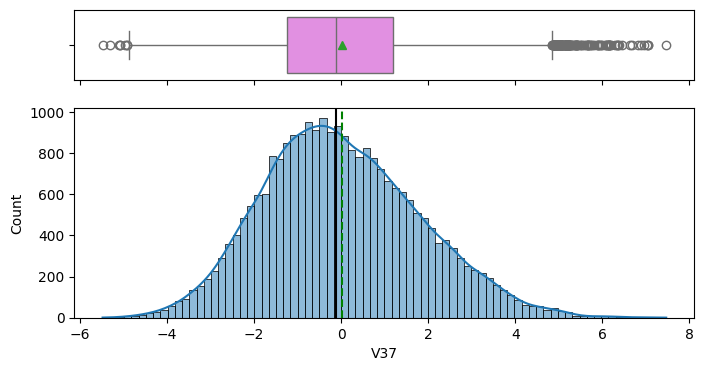

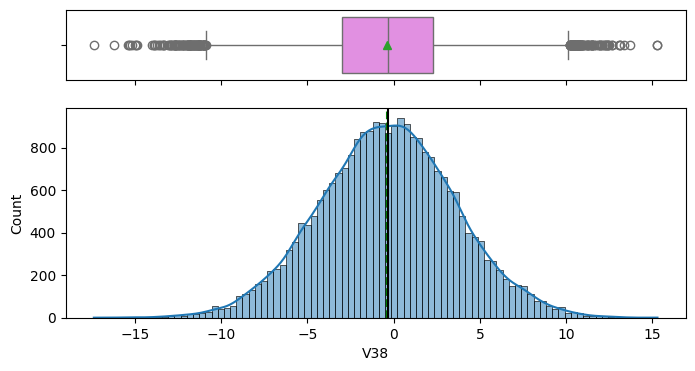

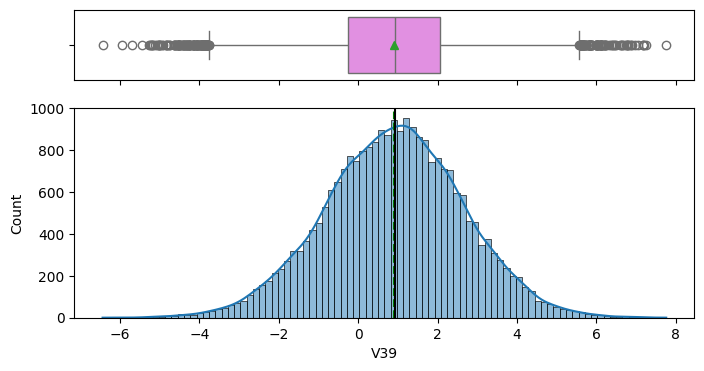

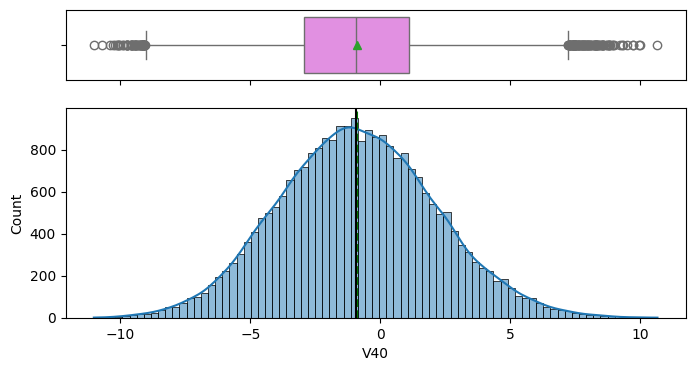

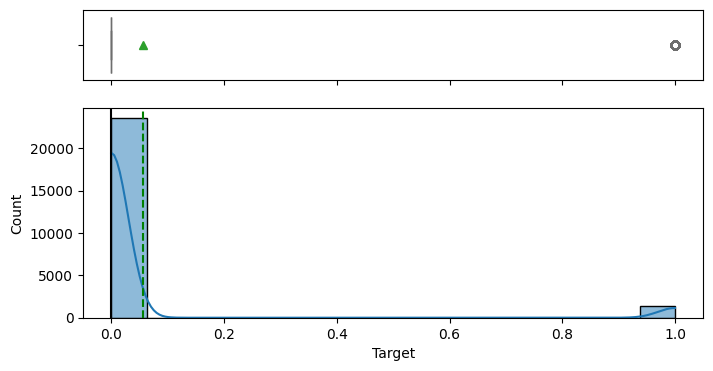

In [ ]:
for feature in data.columns:
    histogram_boxplot(df, feature, figsize=(8, 4), kde=True, bins=None)

Observations

* Majority of the Predictor variables have high levels of Normality evident with the near perfect Bell-shaped curves of most. This is probably due to a transformation that was done during the data's ciphering.

* The Target variable is highly imbalanced. This is going create a bias of the models towards the majority class.

* V18 and V1 are the least Normally distributed among the predictor variables judging from the shape of the Kde Line.

* All the predictor variables have outliers beyond both whiskers of their box plots.

Insights

* Need to incorporate Oversampling and Undersampling to reduce model biase towards majority class.

* Need to consider using Decision Tree and Random Forest hyperparameter of class_weight to improve on these models' ability to identify the minority class.

* Need to investigate and treat Outliers in the train data set and assess whether there is model improvement with and without Outliers.

## Multivariate Analysis

#### Correlation between the variables

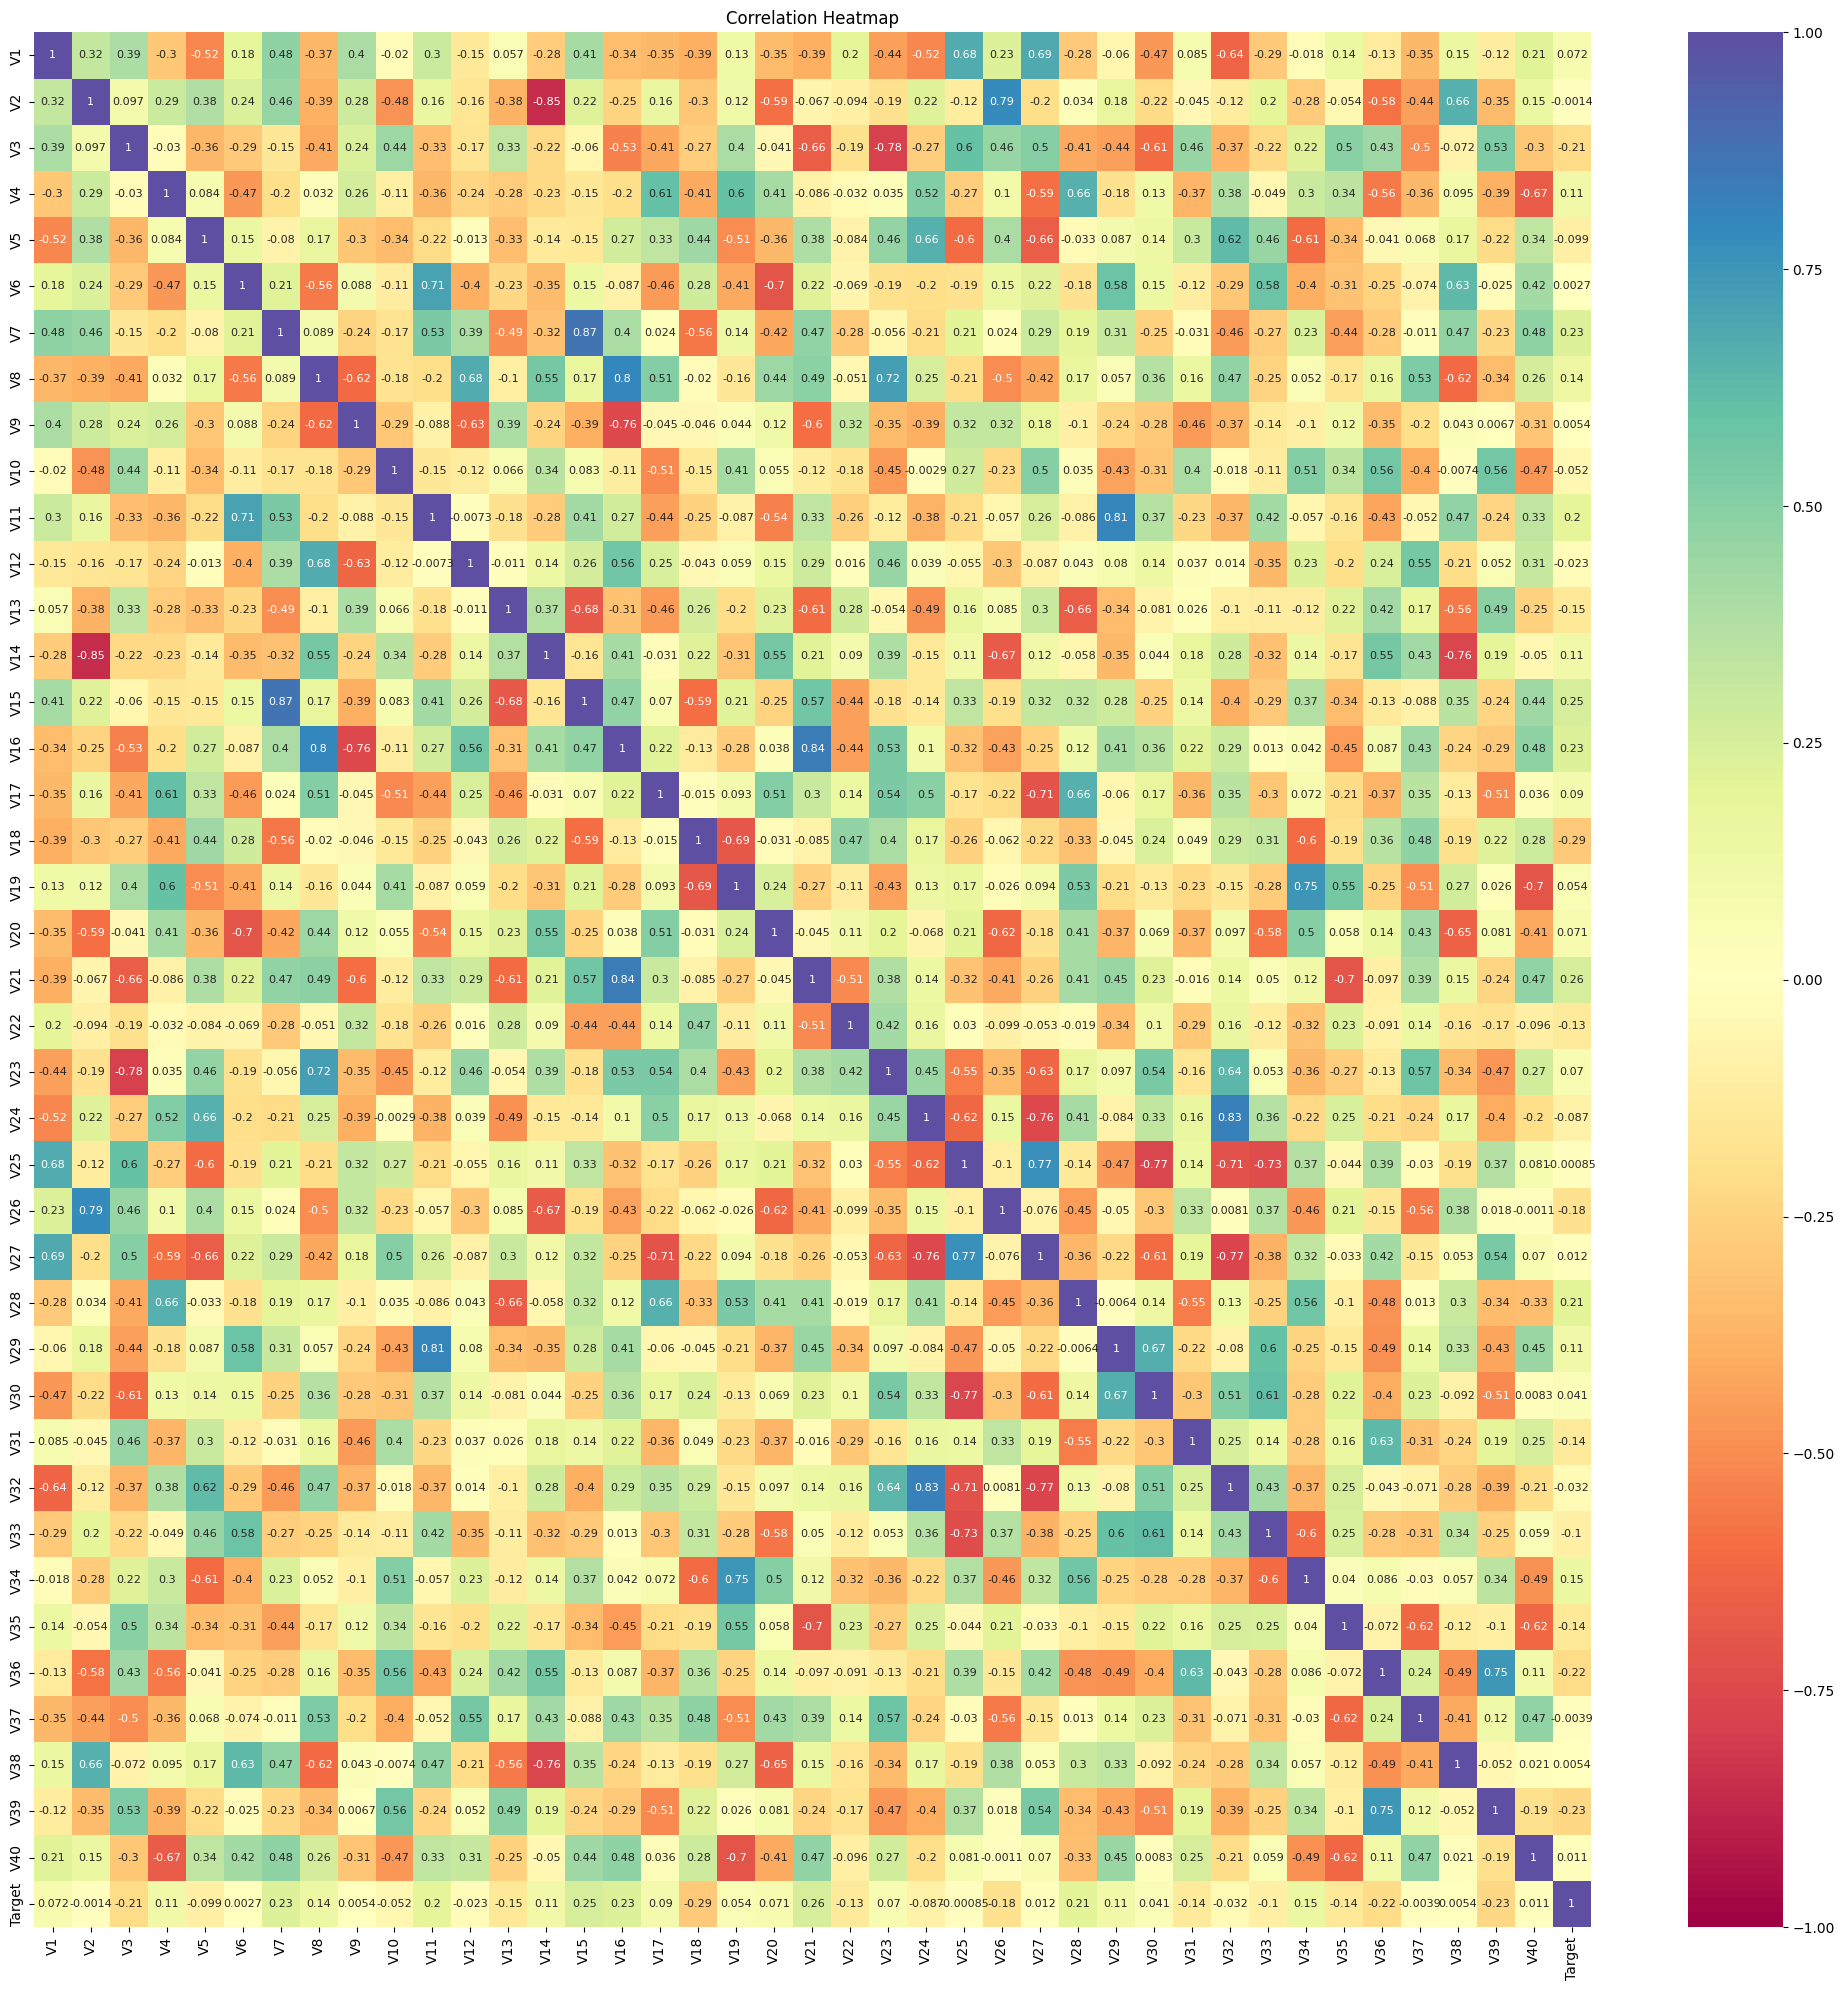

In [ ]:
# Plotting a heatmap to visualise correlation among the variables

plt.figure(figsize=(20,20)) # Specifying the plot area
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1,annot_kws={"size": 8});
plt.title('Correlation Heatmap');
plt.tight_layout()
plt.show()

Observations;

* There exists large correlations above 50% between pairs of some predictor variables. This signifies a likelihood of high multicollinearity issues during building and tuning the Logistic Regression Model.

* All the predictor variables independently have a weak correlation below 30% with the Target variable. This could signify that prediction of the Target variable could be reliant on a complex interaction of multiple predictor variables.

* V3 (21% Correlation), V7 (23% Correlation), V11 (20% Correlation), V15 (25% Correlation), V16 (23% Correlation) V18 (29% Correlation), V21 (26% Correlation), V28 (21% Correlation), V36 (22% Correlation) and V39 (23% Correlation) could be the best predictors of the Target variable.

Insights;

* Carryout VIF to reduce multicollinearity while working on the Logistic Regression Model.

* Need to do Dimensionality reduction through Feature selection by Lasso regularisation during the Feature Engineering process to help improve performance of the models

## Data Pre-processing

#### Outlier Detection and Treatment

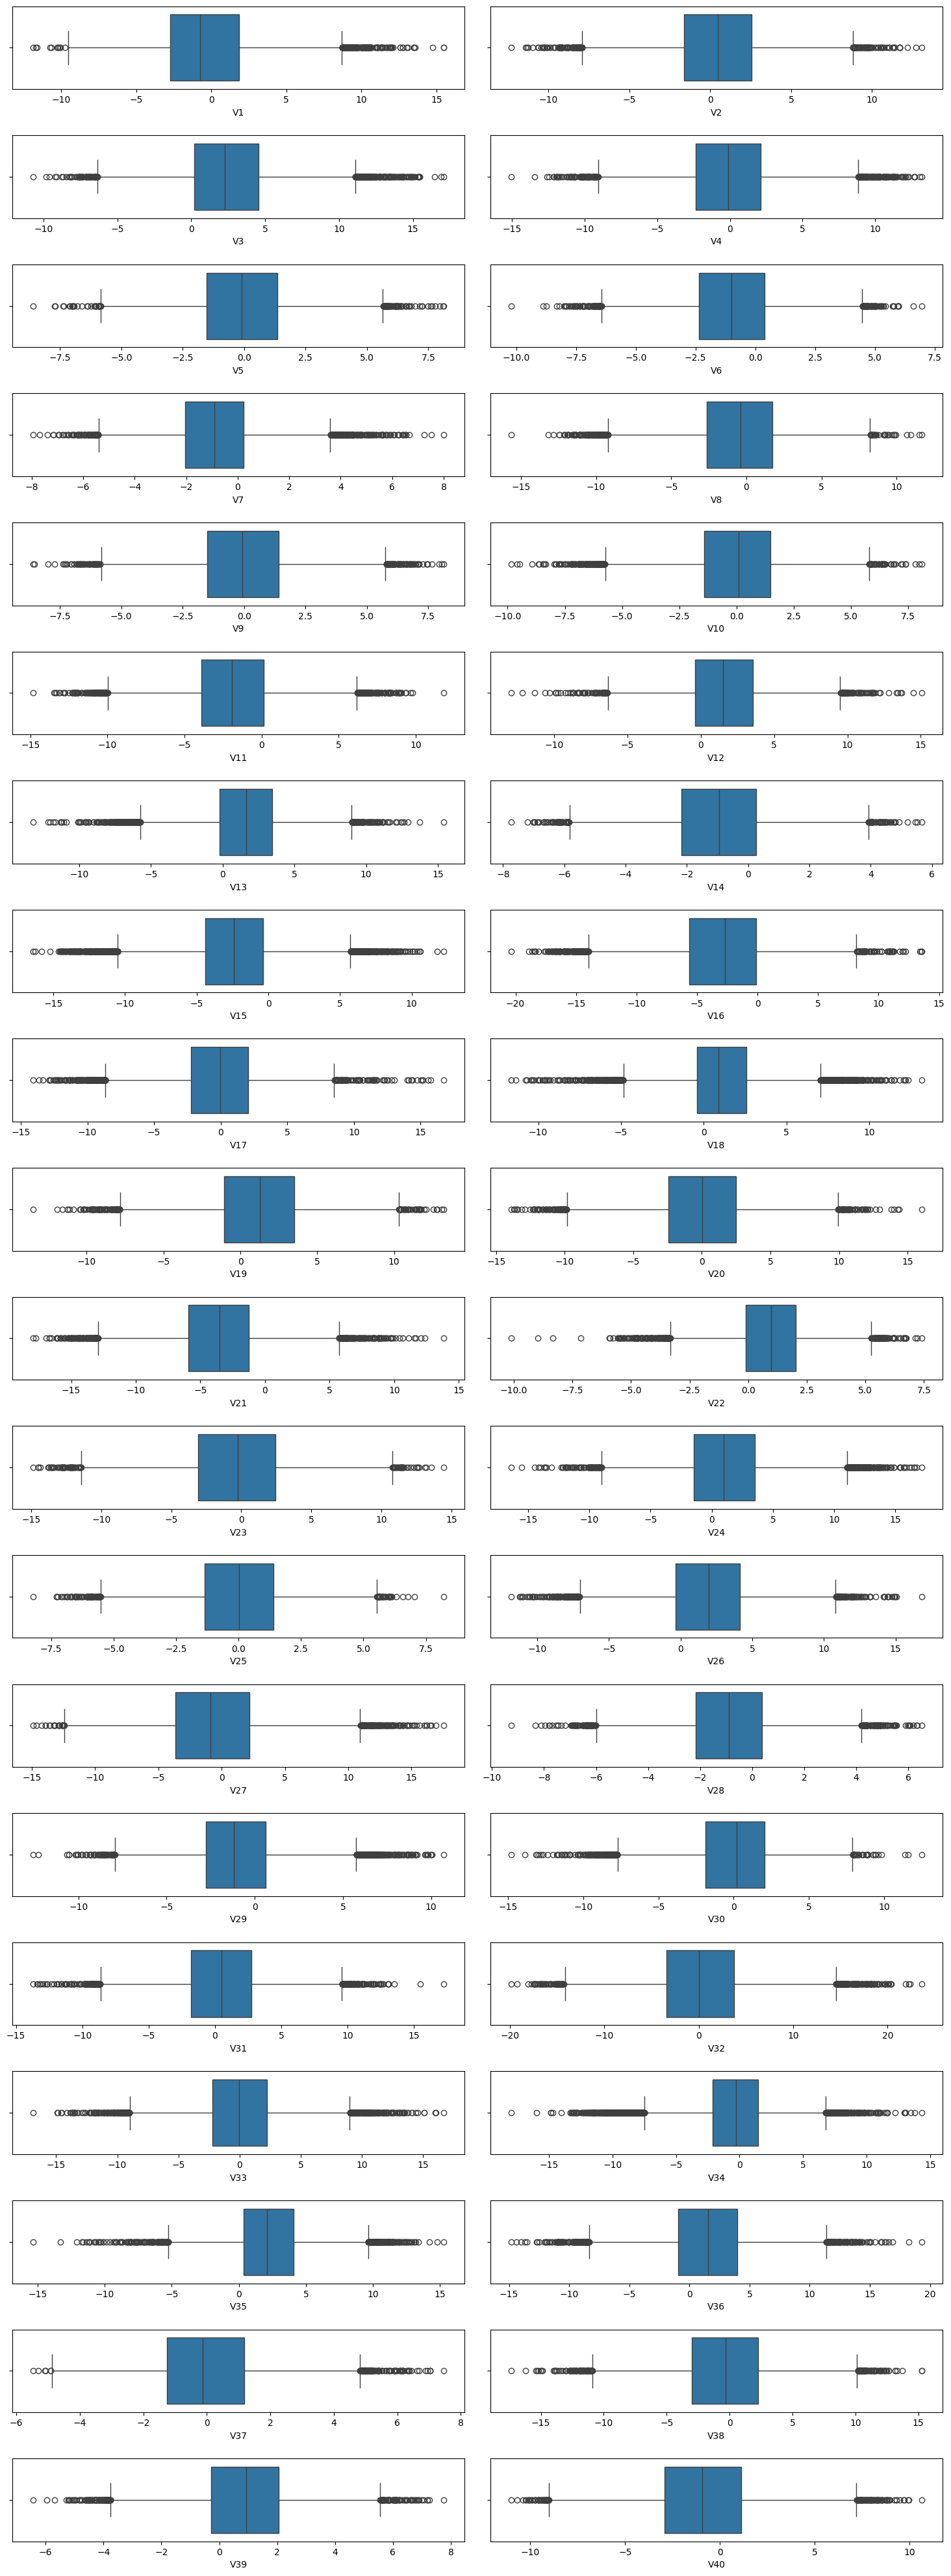

In [ ]:
# Creating copy of the Train data
train_set = Train_data.copy()

# Creating copy of the Test data
test_set = Test_data.copy()

# Outlier detection in train set using box plot
num_cols = train_set.select_dtypes(include=np.number).columns.tolist()
# Dropping the target variable from the list
num_cols.remove('Target')

plt.figure(figsize=(15, 40)) # Configuring size of plot

# Plotting the box plots
for i, variable in enumerate(num_cols):
    plt.subplot(20, 2, i + 1)
    sns.boxplot(data=train_set, x=variable)
    plt.tight_layout(pad=2)

plt.show() # show the plot

Observation;

* All the predictor variables have outliers beyond bith the lower and upper whiskers of the box plots.

Insight;
* Given that the data is transformed and tending to follow a normal distribution for majority of the predictor variables, I will consider these as actual data points. In the event that the outliers negatively affect the performance of my models, then I would clip them at the lower and upper whiskers and evaluate improvement or decline of the models' performance.

## Data Preparation for Modeling

#### Splitting the data

In [ ]:
# Splitting the Train data into predictors (X) and Target (Y)
temp_X = train_set.drop('Target', axis=1)
temp_y = train_set['Target']

# Splitting into train and Validation sets
X_train, X_val, y_train, y_val = train_test_split(temp_X, temp_y, test_size=0.2, random_state=1, stratify=temp_y)

# Splitting the Test data into predictors (X) and Target (Y)
X_test = test_set.drop('Target', axis=1)
y_test = test_set['Target']

# Viewing the proportion of Target
print('y_train')
print(y_train.value_counts(normalize=True))
print("-"*40)
print('y_Validation')
print(y_val.value_counts(normalize=True))
print("-"*40)
print('y_test')
print(y_test.value_counts(normalize=True))

y_train
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
----------------------------------------
y_Validation
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
----------------------------------------
y_test
Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64


In [ ]:
# View the shape of the data sets
print('X_train','y_train')
print(X_train.shape, y_train.shape)
print("-"*40)
print('X_val','y_Val')
print(X_val.shape, y_val.shape)
print("-"*40)
print('X_test','y_test')
print(X_test.shape, y_test.shape)

X_train y_train
(16000, 40) (16000,)
----------------------------------------
X_val y_Val
(4000, 40) (4000,)
----------------------------------------
X_test y_test
(5000, 40) (5000,)


Observation;

The proportion of Target variable values in train set, validation set and test set are similar thus properly distributed within the sets to ensure good model training.

## Missing value imputation




#### Imputing missing values in Train set

In [ ]:
# Imputing the missing values with the median
imputer = SimpleImputer(missing_values = np.nan, strategy='median') # Defining the imputer
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns) # Calculating and Fitting the imputer on the train set
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns) # Fitting the imputer on the validation set
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns) # Fitting the imputer on the test set

# Checking whether all missing values are imputed
print('X_train')
print(X_train.isnull().sum())
print('-'*40)
print('X_val')
print(X_val.isnull().sum())
print('-'*40)
print('X_test')
print(X_test.isnull().sum())

X_train
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
----------------------------------------
X_val
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
----------------------------------------
X_test
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    

All missing values have been imputed

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc,"Recall": recall,"Precision": precision,"F1": f1},
        index=[0],)

    return df_perf

In [ ]:
# User defined function to build a Confusion matrix of Classification model build in sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

## Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result = cross_val_score(model, X_train, y_train, scoring=scorer, cv=kfold)
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")
val_scores = []  # Empty list to store all model's recall scores on validation set
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    val_scores.append(scores)
    print("{}: {}".format(name, scores))



Cross-Validation performance on training dataset:

dtree: 0.7196280073636767
Bagging: 0.7083222243382213
Random forest: 0.7195899193804354
GBM: 0.7173363803719928
Adaboost: 0.5382784231574939
Logistic Regression: 0.48988129245223133

Validation Performance:

dtree: 0.7387387387387387
Bagging: 0.7207207207207207
Random forest: 0.7432432432432432
GBM: 0.7432432432432432
Adaboost: 0.5630630630630631
Logistic Regression: 0.49099099099099097


In [ ]:
# Saving Validation Performances of each model in a variable
dtree_val_score = val_scores[0]
bagging_val_score = val_scores[1]
rf_val_score = val_scores[2]
gbm_val_score = val_scores[3]
adaboost_val_score = val_scores[4]
logistic_val_score = val_scores[5]

In [ ]:
# Saving Validation Performances of each model in a DataFrame
original_models_var_scores = pd.DataFrame({'Accuracy': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                                           'Recall': [dtree_val_score, bagging_val_score, rf_val_score,
                                                      gbm_val_score, adaboost_val_score, logistic_val_score],
                                           'Precision': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                                           'F1': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]},
                                          index=['Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting',
                                                 'Ada Boost', 'Logistic Regression'])
original_models_var_scores

Accuracy    Recall  Precision  F1
Decision Tree             NaN  0.738739        NaN NaN
Bagging                   NaN  0.720721        NaN NaN
Random Forest             NaN  0.743243        NaN NaN
Gradient Boosting         NaN  0.743243        NaN NaN
Ada Boost                 NaN  0.563063        NaN NaN
Logistic Regression       NaN  0.490991        NaN NaN

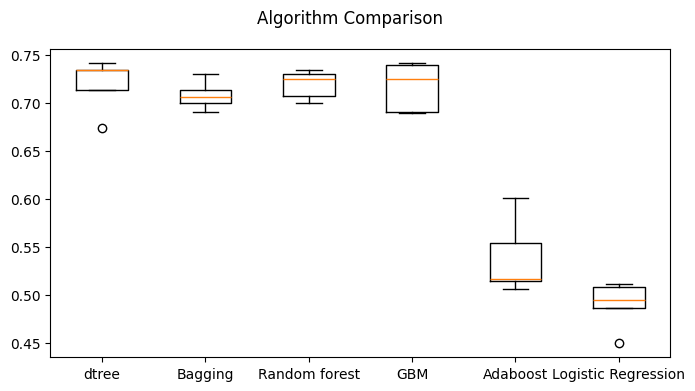

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(8, 4))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Observations

* None of the 6 models is Overfitting or underfitting the training data evident with a Recall performance difference less that 5% between the Training set and Validation set.

* All the models tended to perform better on the validation data set compared to the training data set.

* Recall performance of the Logistic Regression and the Adaboost models were far below that of the other models.

* The Random Forest and Bagging Classifier models had the least variance in performance.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((30224, 40), (30224,))

#### Training all the model using the Over sampled Data

In [ ]:
models = []  # Empty list to store all the models
val_score_df = pd.DataFrame()  # Empty dataframe to store all model's validation scores

# Appending models into the list
models.append(("Decision tree Oversampled", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging Oversampled", BaggingClassifier(random_state=1)))
models.append(("Random forest Oversampled", RandomForestClassifier(random_state=1)))
models.append(("GBM Oversampled", GradientBoostingClassifier(random_state=1)))
models.append(("Ada boost Oversampled", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression Oversampled", LogisticRegression(random_state=1)))

fitted_models = []  # Empty list to store all trained models
names_over = []  # Empty list to store name of the models

# loop through all models to fit them with the Oversampled data
for name, model in models:
    model.fit(X_train_over, y_train_over)
    fitted_models.append(model)
    names_over.append(name)
# Getting performance of the trained models on train set and validation set
    print("{} Training performance".format(name))
    print(model_performance_classification_sklearn(model, X_train_over, y_train_over))
    print("\n{} Validation performance".format(name))
    val_perf = model_performance_classification_sklearn(model, X_val, y_val)
    print(val_perf)
    print("-" * 40)
# concating the model performance on validation data into a dataframe
    val_score_df = pd.concat([val_score_df, val_perf], axis=0)
    val_score_df.index = names_over


Decision tree Oversampled Training performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Decision tree Oversampled Validation performance
   Accuracy   Recall  Precision        F1
0   0.94925  0.81982   0.527536  0.641975
----------------------------------------
Bagging Oversampled Training performance
   Accuracy    Recall  Precision        F1
0  0.999371  0.998941   0.999801  0.999371

Bagging Oversampled Validation performance
   Accuracy    Recall  Precision       F1
0   0.97825  0.842342   0.782427  0.81128
----------------------------------------
Random forest Oversampled Training performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Random forest Oversampled Validation performance
   Accuracy    Recall  Precision        F1
0    0.9885  0.855856   0.931373  0.892019
----------------------------------------
GBM Oversampled Training performance
   Accuracy    Recall  Precision        F1
0  0.950635  0.926284   0.973706  

Decision tree Oversampled Training Confusion matrix


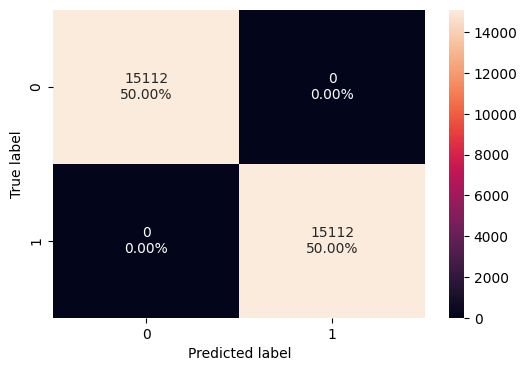


Decision tree Oversampled Validation Confusion matrix


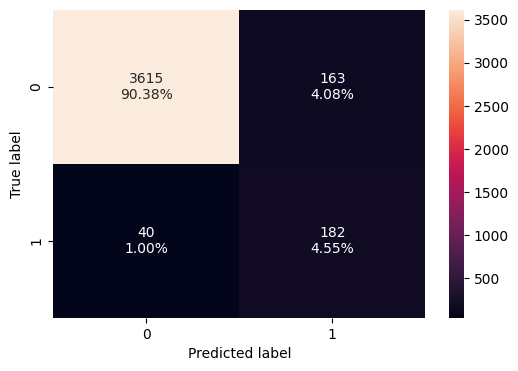

----------------------------------------
Bagging Oversampled Training Confusion matrix


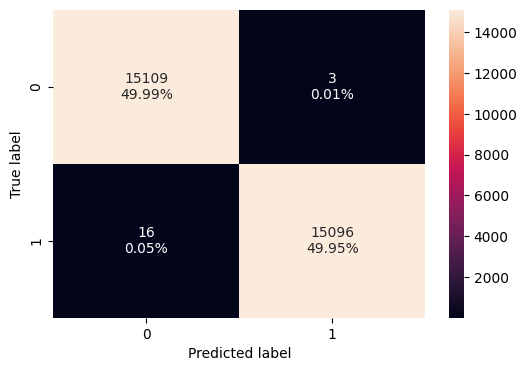


Bagging Oversampled Validation Confusion matrix


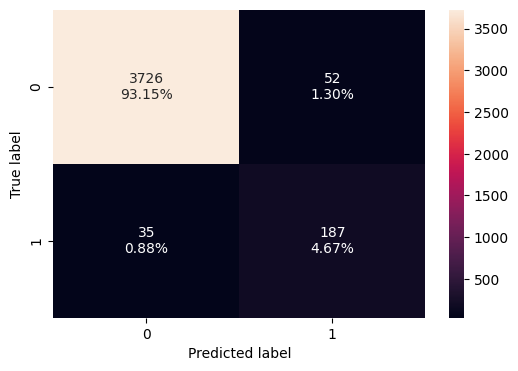

----------------------------------------
Random forest Oversampled Training Confusion matrix


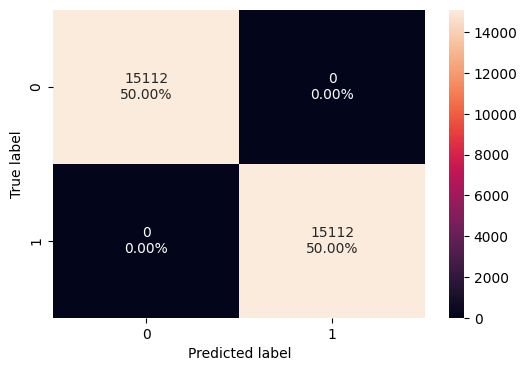


Random forest Oversampled Validation Confusion matrix


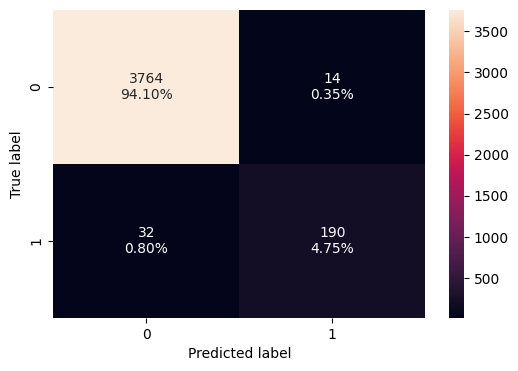

----------------------------------------
GBM Oversampled Training Confusion matrix


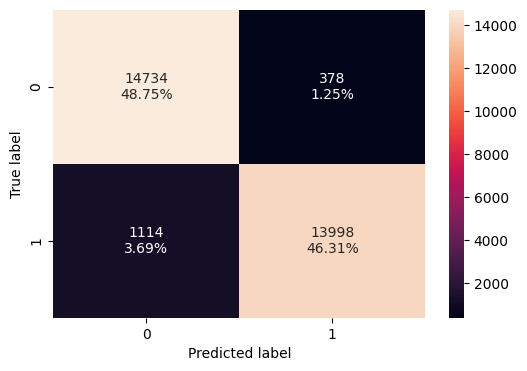


GBM Oversampled Validation Confusion matrix


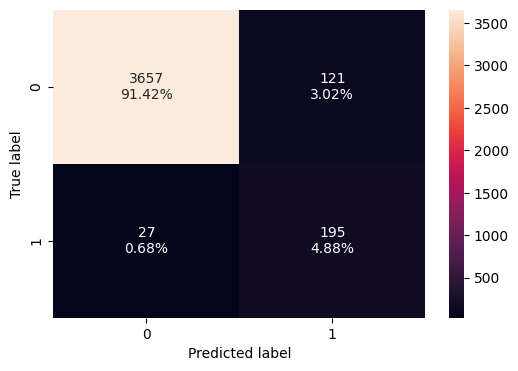

----------------------------------------
Ada boost Oversampled Training Confusion matrix


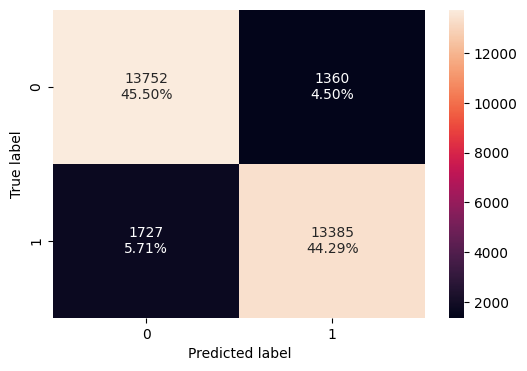


Ada boost Oversampled Validation Confusion matrix


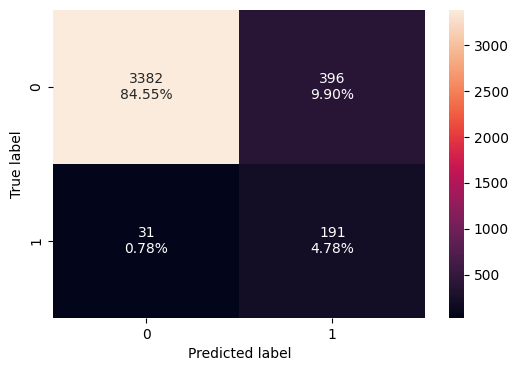

----------------------------------------
Logistic Regression Oversampled Training Confusion matrix


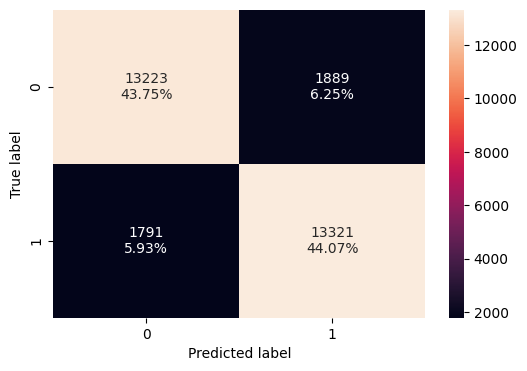


Logistic Regression Oversampled Validation Confusion matrix


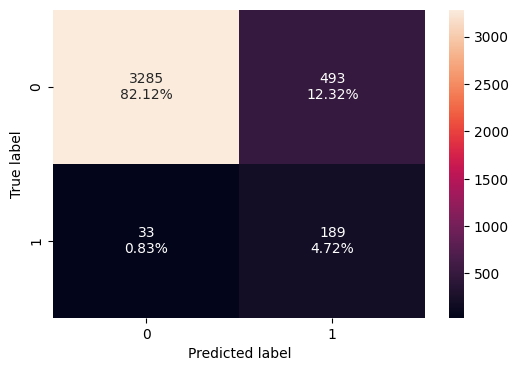

----------------------------------------


In [ ]:
# Plotting Confusion matrix for the models' performance on train and validation set
# loop through all models to construct confusion matrix
for name, model in models:
    print("{} Training Confusion matrix".format(name))
    confusion_matrix_sklearn(model, X_train_over, y_train_over)
    plt.show()
    print("\n{} Validation Confusion matrix".format(name))
    confusion_matrix_sklearn(model, X_val, y_val)
    plt.show()
    print("-" * 40)

Observations;

* The Decision tree, Random Forest and Bagging Classifier are Overfitting the oversampled data.

* The rest of the models are not Overfitting.

* The Gradient Boost model had least comprimise on Precision and yet with high Recall with the least number of False Negatives.

Insights;

* The Decision tree, Random Forest and Bagging Classifier need Hyperparameter tuning to reduce overfitting. The rest of the model also need tuning to further boost Recall performance.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

#### Training all the model using the Undersampled Data

In [ ]:
models = []  # Empty list to store all the models
val_score_un = pd.DataFrame()  # Empty dataframe to store all model's validation scores

# Appending models into the list
models.append(("Decision tree undersampled", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging undersampled", BaggingClassifier(random_state=1)))
models.append(("Random forest undersampled", RandomForestClassifier(random_state=1)))
models.append(("GBM undersampled", GradientBoostingClassifier(random_state=1)))
models.append(("Ada boost undersampled", AdaBoostClassifier(random_state=1)))
models.append(("Logistic Regression undersampled", LogisticRegression(random_state=1)))

fitted_models = []  # Empty list to store all trained models
names_un = []  # Empty list to store name of the models

# loop through all models to fit them with the Oversampled data
for name, model in models:
    model.fit(X_train_un, y_train_un)
    fitted_models.append(model)
    names_un.append(name)
# Getting performance of the trained models on train set and validation set
    print("{} Training performance".format(name))
    print(model_performance_classification_sklearn(model, X_train_un, y_train_un))
    print("\n{} Validation performance".format(name))
    val_un_perf = model_performance_classification_sklearn(model, X_val, y_val)
    print(val_un_perf)
    print("-" * 40)
# concating the model performance on validation data into a dataframe
    val_score_un = pd.concat([val_score_un, val_un_perf], axis=0)
    val_score_un.index = names_un

Decision tree undersampled Training performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Decision tree undersampled Validation performance
   Accuracy    Recall  Precision        F1
0   0.81625  0.846847   0.211474  0.338434
----------------------------------------
Bagging undersampled Training performance
   Accuracy    Recall  Precision        F1
0  0.990991  0.983108   0.998856  0.990919

Bagging undersampled Validation performance
   Accuracy    Recall  Precision        F1
0     0.932  0.891892   0.443946  0.592814
----------------------------------------
Random forest undersampled Training performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Random forest undersampled Validation performance
   Accuracy    Recall  Precision        F1
0     0.944  0.878378   0.497449  0.635179
----------------------------------------
GBM undersampled Training performance
   Accuracy    Recall  Precision        F1
0  0.963401  0.939189  

Decision tree undersampled Training Confusion matrix


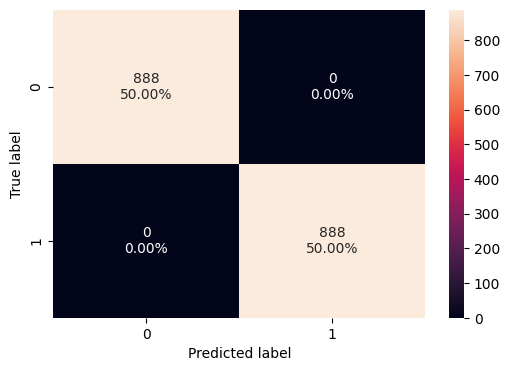


Decision tree undersampled Validation Confusion matrix


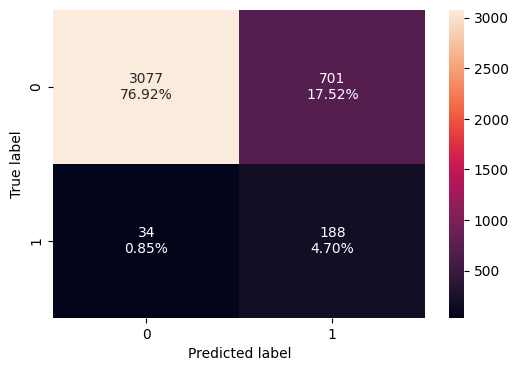

----------------------------------------
Bagging undersampled Training Confusion matrix


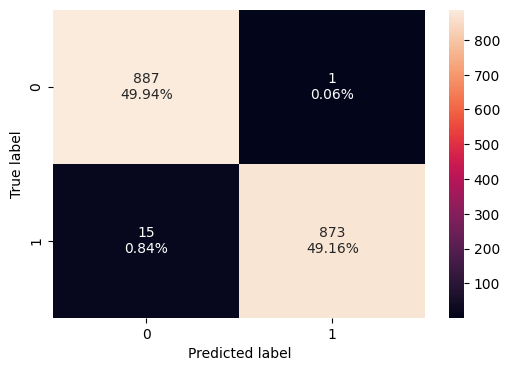


Bagging undersampled Validation Confusion matrix


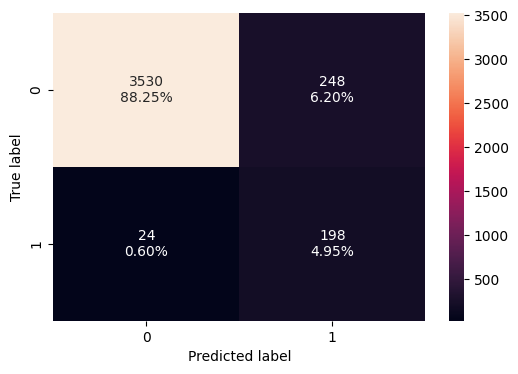

----------------------------------------
Random forest undersampled Training Confusion matrix


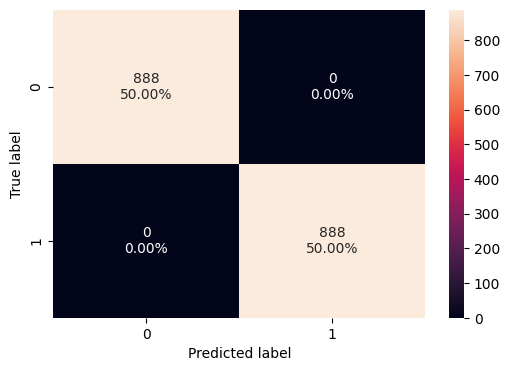


Random forest undersampled Validation Confusion matrix


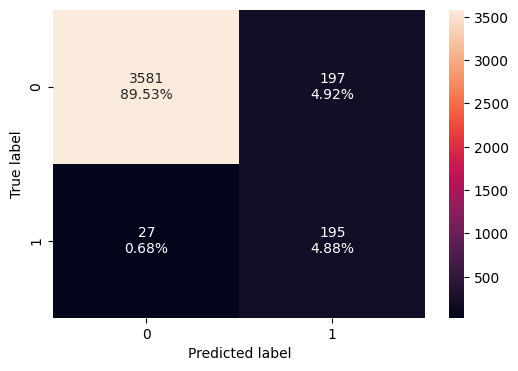

----------------------------------------
GBM undersampled Training Confusion matrix


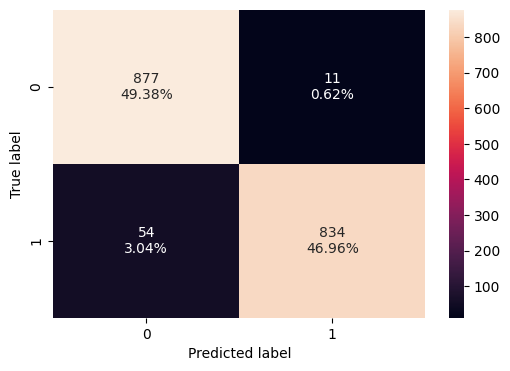


GBM undersampled Validation Confusion matrix


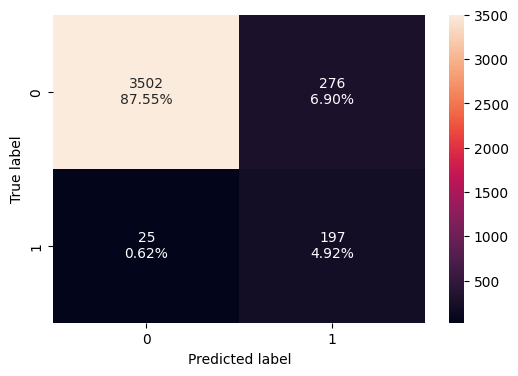

----------------------------------------
Ada boost undersampled Training Confusion matrix


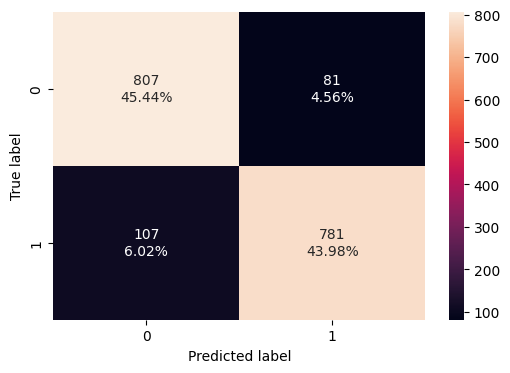


Ada boost undersampled Validation Confusion matrix


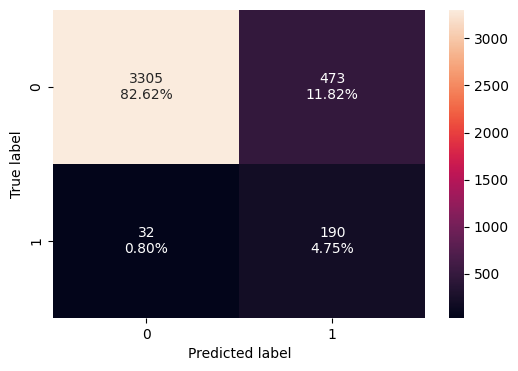

----------------------------------------
Logistic Regression undersampled Training Confusion matrix


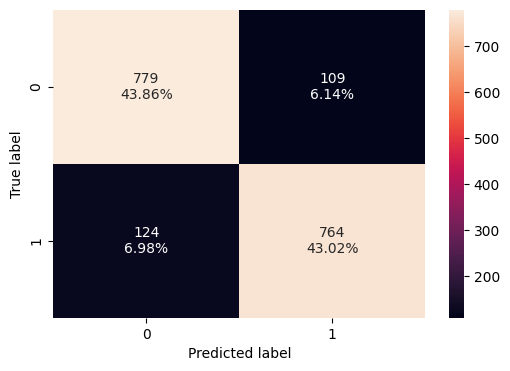


Logistic Regression undersampled Validation Confusion matrix


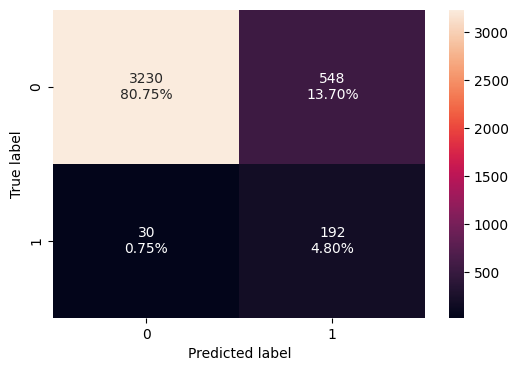

----------------------------------------


In [ ]:
# Plotting Confusion matrix for the models' performance on train and validation set
# loop through all models to construct confusion matrix
for name, model in models:
    print("{} Training Confusion matrix".format(name))
    confusion_matrix_sklearn(model, X_train_un, y_train_un)
    plt.show()
    print("\n{} Validation Confusion matrix".format(name))
    confusion_matrix_sklearn(model, X_val, y_val)
    plt.show()
    print("-" * 40)

Observations;

* Only the Ada Boost and Logistic Regression models are not overfitting the training data. The rest of the models are Overfitting.

* The models generally had few False Negatives compared to those witnessed in the confusion matrix of the models trained on oversampled data.

Insights:
Need to select which which sampling technique gave the best model performance.

## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Models with original data

#### Decision Tree Model

In [ ]:
# User defined function for getting best parameters for Decision tree
def DT_best_params(predictor, target):
  # defining model
  Model = DecisionTreeClassifier(random_state=1)

  # Parameter grid to pass in RandomSearchCV
  param_grid = {'max_depth': np.arange(2,6),
                'min_samples_leaf': [1, 4, 7],
                'max_leaf_nodes' : [10,15],
                'min_impurity_decrease': [0.0001,0.001] }

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10
                                     , n_jobs = -1, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(predictor, target)

  print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_
                                                          ,randomized_cv.best_score_))

In [ ]:
# Getting best parameter combination for the Decision tree
DT_best_params(X_train, y_train)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5675998222560782:


In [ ]:
# Building model using best parameters
DT_tuned = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 7, max_leaf_nodes= 15
                                  , min_impurity_decrease= 0.0001,)

# Fit the model on training data
DT_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Checking performance on Train data
DT_tuned_train_performance = model_performance_classification_sklearn(DT_tuned, X_train, y_train)
DT_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.973938  0.593468   0.903945  0.716519

In [ ]:
# Checking performance on validation data
DT_tuned_val_performance = model_performance_classification_sklearn(DT_tuned, X_val, y_val)
DT_tuned_val_performance.index = ["Decision_Tree_tuned"]
DT_tuned_val_performance

Accuracy    Recall  Precision        F1
Decision_Tree_tuned     0.969  0.576577   0.810127  0.673684

There is no overfitting but the model is not generalising well and thus will be a poor performer in deployment

#### Bagging Classifier Model

In [ ]:
# User defined function for getting best parameters for Bagging Classifier
def Bagging_best_params(predictor, target):
  # defining model
  Model = BaggingClassifier(random_state=1)

  # Parameter grid to pass in RandomSearchCV
  param_grid = {'max_samples': [0.8,0.9,1],
                'max_features': [0.7,0.8,0.9],
                'n_estimators' : [30,50,70],}

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10
                                     , n_jobs = -1, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(predictor, target)

  print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_
                                                          ,randomized_cv.best_score_))

In [ ]:
# Getting best parameter combination for Bagging classifier
Bagging_best_params(X_train, y_train)

Best parameters are {'n_estimators': 30, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.728648511394655:


In [ ]:
# Building model using best parameters
Bagging_tuned = BaggingClassifier(n_estimators= 30, max_samples= 0.9, max_features= 0.9)

# Fit the model on training data
Bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30)

In [ ]:
# Checking performance on Train data
Bagging_tuned_train_performance = model_performance_classification_sklearn(Bagging_tuned, X_train, y_train)
Bagging_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.999188  0.986486    0.99886  0.992635

In [ ]:
# Checking performance on validation data
Bagging_tuned_val_performance = model_performance_classification_sklearn(Bagging_tuned, X_val, y_val)
Bagging_tuned_val_performance.index = ["Bagging_tuned"]
Bagging_tuned_val_performance

Accuracy   Recall  Precision        F1
Bagging_tuned    0.9835  0.72973   0.964286  0.830769

The model is overfitting the train data and thus is not suitable for deployment

#### Random Forest Classifier

In [ ]:
# User defined function for getting best parameters for Random Forest Classifier
def rf_best_params(predictor, target):
  # defining model
  Model = RandomForestClassifier(random_state=1)

  # Parameter grid to pass in RandomSearchCV
  param_grid = {'n_estimators': [200,250,300], "min_samples_leaf": np.arange(1, 4),
                "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
                "max_samples": np.arange(0.4, 0.7, 0.1)}

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10
                                     , n_jobs = -1, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(predictor, target)

  print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_
                                                          ,randomized_cv.best_score_))

In [ ]:
# Getting the best parameters
rf_best_params(X_train, y_train)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7038786262934045:


In [ ]:
# Building model using best parameters
rf_tuned = RandomForestClassifier(n_estimators=300, min_samples_leaf=1,
                                  max_samples= 0.6, max_features= 'sqrt')

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=300)

In [ ]:
# Checking performance on Train data
rf_tuned_train_performance = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.995062  0.911036        1.0  0.953447

In [ ]:
# Checking performance on validation data
rf_tuned_val_performance = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
rf_tuned_val_performance.index = ["rf_tuned"]
rf_tuned_val_performance

Accuracy    Recall  Precision        F1
rf_tuned     0.984  0.725225   0.981707  0.834197

The model is overfitting and unsuitable for deployment

#### Gradient Boost Classifier

In [ ]:
# User defined function for getting best parameters for Gradient Boost Classifier
def GBM_best_params(predictor, target):
  # defining model
  Model = GradientBoostingClassifier(random_state=1)

  # Parameter grid to pass in RandomSearchCV
  param_grid = {"n_estimators": np.arange(100,150,25),
                "learning_rate": [0.2, 0.05, 1],
                "subsample":[0.5,0.7],
                "max_features":[0.5,0.7]}

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10
                                     , n_jobs = -1, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(predictor, target)

  print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_
                                                          ,randomized_cv.best_score_))

In [ ]:
# Finding best hyperparameter combination
GBM_best_params(X_train, y_train)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7557354154764171:


In [ ]:
# Building model using best parameters
GBM_tuned = GradientBoostingClassifier(subsample= 0.7, n_estimators= 125,
                                       max_features= 0.5, learning_rate= 0.2)

# Fit the model on training data
GBM_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [ ]:
# Checking performance on Train data
GBM_tuned_train_performance = model_performance_classification_sklearn(GBM_tuned, X_train, y_train)
GBM_tuned_train_performance

Accuracy   Recall  Precision        F1
0  0.993938  0.89527   0.994994  0.942501

In [ ]:
# Checking performance on validation data
GBM_tuned_val_performance = model_performance_classification_sklearn(GBM_tuned, X_val, y_val)
GBM_tuned_val_performance.index = ["GBM_tuned"]
GBM_tuned_val_performance

Accuracy    Recall  Precision        F1
GBM_tuned   0.98375  0.792793   0.902564  0.844125

The model is overfitting. Not fit for deployment

#### AdaBoost Classifier

In [ ]:
# User defined function for getting best parameters for AdaBoost Classifier
def AdaBoost_best_params(predictor, target):
  # defining model
  Model = AdaBoostClassifier(random_state=1)

  # Parameter grid to pass in RandomSearchCV
  param_grid = {"n_estimators": [100, 150, 200],
                "learning_rate": [0.2, 0.05],
                "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                                   DecisionTreeClassifier(max_depth=2, random_state=1),
                                   DecisionTreeClassifier(max_depth=3, random_state=1),]}

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10
                                     , n_jobs = -1, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(predictor, target)

  print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_
                                                          ,randomized_cv.best_score_))

In [ ]:
# Finding best hyperparameter combination
AdaBoost_best_params(X_train, y_train)

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.729822890877928:


In [ ]:
# Building model using best parameters
AdaBoost_tuned = AdaBoostClassifier(n_estimators= 200, learning_rate= 0.2,
                                    estimator= DecisionTreeClassifier(max_depth=3,
                                                                      random_state=1))

# Fit the model on training data
AdaBoost_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
# Checking performance on Train data
AdaBoost_tuned_train_performance = model_performance_classification_sklearn(AdaBoost_tuned, X_train, y_train)
AdaBoost_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.986812  0.773649   0.985653  0.866877

In [ ]:
# Checking performance on validation data
AdaBoost_tuned_val_performance = model_performance_classification_sklearn(AdaBoost_tuned, X_val, y_val)
AdaBoost_tuned_val_performance.index = ["AdaBoost_tuned"]
AdaBoost_tuned_val_performance

Accuracy    Recall  Precision        F1
AdaBoost_tuned    0.9825  0.711712   0.963415  0.818653

The model is overfitting and not suitable for deployment.

#### Logistic Regression Model

In [ ]:
# User defined function for getting best parameters for Logistic Regressor
def Logistic_best_params(predictor, target):
  # defining model
  Model = LogisticRegression(random_state=1)

  # Parameter grid to pass in RandomSearchCV
  param_grid = {'C': np.arange(0.1,1.1,0.1)}

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10
                                     , n_jobs = -1, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(predictor, target)

  print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_
                                                          ,randomized_cv.best_score_))

In [ ]:
# Finding the best hyperparameter combination
Logistic_best_params(X_train, y_train)

Best parameters are {'C': 0.1} with CV score=0.48091792039611503:


In [ ]:
# Building model using best parameters
Logistic_tuned = LogisticRegression(C= 0.1)

# Fit the model on training data
Logistic_tuned.fit(X_train, y_train)
Logistic_tuned.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
# Checking performance on Train data
Logistic_tuned_train_performance = model_performance_classification_sklearn(Logistic_tuned, X_train, y_train)
Logistic_tuned_train_performance

Accuracy    Recall  Precision       F1
0  0.967063  0.492117   0.851852  0.62384

In [ ]:
# Checking performance on validation data
Logistic_tuned_val_performance = model_performance_classification_sklearn(Logistic_tuned, X_val, y_val)
Logistic_tuned_val_performance.index = ["Logistic_tuned"]
Logistic_tuned_val_performance

Accuracy    Recall  Precision        F1
Logistic_tuned   0.96675  0.490991   0.844961  0.621083

The model is not overfitting but has a poor performance on recall that is below 50%.

### Sample tuning method for Decision tree with oversampled data

#### Decision Tree Model

In [ ]:
# Getting best parameter combination for the Decision tree
DT_best_params(X_train_over, y_train_over)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9143060712783726:


In [ ]:
# Building model using best parameters
DTover_tuned = DecisionTreeClassifier(min_samples_leaf= 7,
                                      min_impurity_decrease= 0.001,
                                      max_leaf_nodes= 15,
                                      max_depth= 3)

# Fit the model on training data
DTover_tuned.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7)

In [ ]:
# Checking performance on Train data
DTover_tuned_train_performance = model_performance_classification_sklearn(DTover_tuned, X_train_over, y_train_over)
DTover_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.838307  0.917086    0.79226  0.850115

In [ ]:
# Checking performance on validation data
DTover_tuned_val_performance = model_performance_classification_sklearn(DTover_tuned, X_val, y_val)
DTover_tuned_val_performance.index = ["Decision_Tree_over_tuned"]
DTover_tuned_val_performance

Accuracy    Recall  Precision        F1
Decision_Tree_over_tuned     0.752  0.873874    0.16753  0.281159

Observation;

The model is not overfitting and is a candidate for deployment

#### Bagging Classifier Model

In [ ]:
# Getting best parameter combination for Bagging classifier
Bagging_best_params(X_train_over, y_train_over)

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.9835230801665501:


In [ ]:
# Building model using best parameters
Baggingover_tuned = BaggingClassifier(n_estimators= 70, max_samples= 0.9, max_features= 0.9)

# Fit the model on training data
Baggingover_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70)

In [ ]:
# Checking performance on Train data
BaggingOver_tuned_train_performance = model_performance_classification_sklearn(Baggingover_tuned, X_train_over, y_train_over)
BaggingOver_tuned_train_performance

Accuracy  Recall  Precision        F1
0  0.999967     1.0   0.999934  0.999967

In [ ]:
# Checking performance on validation data
BaggingOver_tuned_val_performance = model_performance_classification_sklearn(Baggingover_tuned, X_val, y_val)
BaggingOver_tuned_val_performance.index = ["Bagging_over_tuned"]
BaggingOver_tuned_val_performance

Accuracy    Recall  Precision        F1
Bagging_over_tuned    0.9825  0.837838   0.845455  0.841629

The model is overfitting the train data and thus is not suitable for deployment

#### Random Forest Classifier

In [ ]:
# Getting the best parameters
rf_best_params(X_train_over, y_train_over)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9808099737442019:


In [ ]:
# Building model using best parameters
rfover_tuned = RandomForestClassifier(n_estimators=300, min_samples_leaf=1,
                                  max_samples= 0.6, max_features= 'sqrt')

# Fit the model on training data
rfover_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300)

In [ ]:
# Checking performance on Train data
rfover_tuned_train_performance = model_performance_classification_sklearn(rfover_tuned, X_train_over, y_train_over)
rfover_tuned_train_performance

Accuracy    Recall  Precision       F1
0  0.999471  0.999074   0.999868  0.99947

In [ ]:
# Checking performance on validation data
rfover_tuned_val_performance = model_performance_classification_sklearn(rfover_tuned, X_val, y_val)
rfover_tuned_val_performance.index = ["rf_over_tuned"]
rfover_tuned_val_performance

Accuracy   Recall  Precision        F1
rf_over_tuned   0.98875  0.86036   0.931707  0.894614

The model is overfitting and unsuitable for deployment

#### Gradient Boost Classifier

In [ ]:
# Finding best hyperparameter combination
GBM_best_params(X_train_over, y_train_over)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9675751074981506:


In [ ]:
# Building model using best parameters
GBMover_tuned = GradientBoostingClassifier(subsample= 0.7, n_estimators= 125,
                                       max_features= 0.5, learning_rate= 1)

# Fit the model on training data
GBMover_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [ ]:
# Checking performance on Train data
GBMover_tuned_train_performance = model_performance_classification_sklearn(GBMover_tuned, X_train_over, y_train_over)
GBMover_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.989048  0.987493   0.990574  0.989031

In [ ]:
# Checking performance on validation data
GBMover_tuned_val_performance = model_performance_classification_sklearn(GBMover_tuned, X_val, y_val)
GBMover_tuned_val_performance.index = ["GBMover_tuned"]
GBMover_tuned_val_performance

Accuracy   Recall  Precision        F1
GBMover_tuned   0.96175  0.86036   0.610224  0.714019

The model is overfitting and not suitable for deployment

#### AdaBoost Classifier

In [ ]:
# Finding best hyperparameter combination
AdaBoost_best_params(X_train_over, y_train_over)

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9119245939962164:


In [ ]:
# Building model using best parameters
AdaBoostover_tuned = AdaBoostClassifier(n_estimators= 200, learning_rate= 0.2,
                                    estimator= DecisionTreeClassifier(max_depth=3,
                                                                      random_state=1))

# Fit the model on training data
AdaBoostover_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
# Checking performance on Train data
AdaBoostover_tuned_train_performance = model_performance_classification_sklearn(AdaBoostover_tuned, X_train_over, y_train_over)
AdaBoostover_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.938261  0.915895   0.958784  0.936849

In [ ]:
# Checking performance on validation data
AdaBoostover_tuned_val_performance = model_performance_classification_sklearn(AdaBoostover_tuned, X_val, y_val)
AdaBoostover_tuned_val_performance.index = ["AdaBoostover_tuned"]
AdaBoostover_tuned_val_performance

Accuracy    Recall  Precision        F1
AdaBoostover_tuned    0.9495  0.873874   0.527174  0.657627

The model is not overfitting and a candidate for deployment.

#### Logistic Regression Model

In [ ]:
# Finding the best hyperparameter combination
Logistic_best_params(X_train_over, y_train_over)

Best parameters are {'C': 0.1} with CV score=0.8817493196326509:


In [ ]:
# Building model using best parameters
Logistic_over_tuned = LogisticRegression(C= 0.1)

# Fit the model on training data
Logistic_over_tuned.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1)

In [ ]:
# Checking performance on Train data
Logistic_over_tuned_train_performance = model_performance_classification_sklearn(Logistic_over_tuned, X_train_over, y_train_over)
Logistic_over_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.878242  0.881485   0.875805  0.878636

In [ ]:
# Checking performance on validation data
Logistic_over_tuned_val_performance = model_performance_classification_sklearn(Logistic_over_tuned, X_val, y_val)
Logistic_over_tuned_val_performance.index = ["Logistic_over_tuned"]
Logistic_over_tuned_val_performance

Accuracy    Recall  Precision        F1
Logistic_over_tuned    0.8685  0.851351   0.277126  0.418142

The model is not overfitting and a candidate for deployment

### Sample tuning method for Decision tree with undersampled data

#### Decision Tree Model

In [ ]:
# Getting best parameter combination for the Decision tree
DT_best_params(X_train_un, y_train_un)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.8581857423982733:


In [ ]:
# Building model using best parameters
DT_un_tuned = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 1, max_leaf_nodes= 10
                                  , min_impurity_decrease= 0.0001,)

# Fit the model on training data
DT_un_tuned.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001)

In [ ]:
# Checking performance on Train data
DT_un_tuned_train_performance = model_performance_classification_sklearn(DT_un_tuned, X_train_un, y_train_un)
DT_un_tuned_train_performance

Accuracy  Recall  Precision        F1
0  0.898086   0.875   0.917355  0.895677

In [ ]:
# Checking performance on validation data
DT_un_tuned_val_performance = model_performance_classification_sklearn(DT_un_tuned, X_val, y_val)
DT_un_tuned_val_performance.index = ["Decision_Tree_under_tuned"]
DT_un_tuned_val_performance

Accuracy    Recall  Precision        F1
Decision_Tree_under_tuned   0.87925  0.846847   0.295133  0.437718

The model is not overfitting on recall score and a candidate for deployment. The models ability to identify True Positives is greatly reduced in Validation set than Train set.

#### Bagging Classifier Model

In [ ]:
# Getting best parameter combination for Bagging classifier
Bagging_best_params(X_train_un, y_train_un)

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.8953215260585285:


In [ ]:
# Building model using best parameters
Bagging_un_tuned = BaggingClassifier(n_estimators= 70, max_samples= 0.8, max_features= 0.7)

# Fit the model on training data
Bagging_un_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70)

In [ ]:
# Checking performance on Train data
Bagging_un_tuned_train_performance = model_performance_classification_sklearn(Bagging_un_tuned, X_train_un, y_train_un)
Bagging_un_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.997185  0.994369        1.0  0.997177

In [ ]:
# Checking performance on validation data
Bagging_un_tuned_val_performance = model_performance_classification_sklearn(Bagging_un_tuned, X_val, y_val)
Bagging_un_tuned_val_performance.index = ["Bagging_under_tuned"]
Bagging_un_tuned_val_performance

Accuracy    Recall  Precision        F1
Bagging_under_tuned    0.9385  0.887387   0.471292  0.615625

The model is overfitting the train data and thus is not suitable for deployment

#### Random Forest Classifier

In [ ]:
# Getting the best parameters
rf_best_params(X_train_un, y_train_un)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8941979305529106:


In [ ]:
# Building model using best parameters
rf_un_tuned = RandomForestClassifier(n_estimators=250, min_samples_leaf=2,
                                  max_samples= 0.5, max_features= 'sqrt')

# Fit the model on training data
rf_un_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=250)

In [ ]:
# Checking performance on Train data
rf_un_tuned_train_performance = model_performance_classification_sklearn(rf_un_tuned, X_train_un, y_train_un)
rf_un_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.963401  0.932432   0.993998  0.962231

In [ ]:
# Checking performance on validation data
rf_un_tuned_val_performance = model_performance_classification_sklearn(rf_un_tuned, X_val, y_val)
rf_un_tuned_val_performance.index = ["rf_over_tuned"]
rf_un_tuned_val_performance

Accuracy    Recall  Precision        F1
rf_over_tuned     0.936  0.878378   0.459906  0.603715

The model is overfitting and unsuitable for deployment

#### Gradient Boost Classifier

In [ ]:
# Finding best hyperparameter combination
GBM_best_params(X_train_un, y_train_un)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9020567510950295:


In [ ]:
# Building model using best parameters
GBMunder_tuned = GradientBoostingClassifier(subsample= 0.7, n_estimators= 125,
                                       max_features= 0.5, learning_rate= 0.2)

# Fit the model on training data
GBMunder_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [ ]:
# Checking performance on Train data
GBMunder_tuned_train_performance = model_performance_classification_sklearn(GBMunder_tuned,X_train_un, y_train_un)
GBMunder_tuned_train_performance

Accuracy    Recall  Precision        F1
0  0.994932  0.989865        1.0  0.994907

In [ ]:
# Checking performance on validation data
GBMunder_tuned_val_performance = model_performance_classification_sklearn(GBMunder_tuned, X_val, y_val)
GBMunder_tuned_val_performance.index = ["GBMunder_tuned"]
GBMunder_tuned_val_performance

Accuracy    Recall  Precision        F1
GBMunder_tuned    0.9385  0.873874   0.470874  0.611987

The model is overfitting and not suitable for deployment

#### AdaBoost Classifier

In [ ]:
# Finding best hyperparameter combination
AdaBoost_best_params(X_train_un, y_train_un)

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8953088300641147:


In [ ]:
# Building model using best parameters
AdaBoostunder_tuned = AdaBoostClassifier(n_estimators= 200, learning_rate= 0.2,
                                    estimator= DecisionTreeClassifier(max_depth=3,
                                                                      random_state=1))

# Fit the model on training data
AdaBoostunder_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
# Checking performance on Train data
AdaBoostunder_tuned_train_performance = model_performance_classification_sklearn(AdaBoostunder_tuned, X_train_un, y_train_un)
AdaBoostunder_tuned_train_performance

Accuracy   Recall  Precision        F1
0  0.956081  0.92455   0.986779  0.954651

In [ ]:
# Checking performance on validation data
AdaBoostunder_tuned_val_performance = model_performance_classification_sklearn(AdaBoostunder_tuned, X_val, y_val)
AdaBoostunder_tuned_val_performance.index = ["AdaBoostunder_tuned"]
AdaBoostunder_tuned_val_performance

Accuracy    Recall  Precision        F1
AdaBoostunder_tuned   0.93575  0.887387   0.459207  0.605223

The model is not overfitting and is a candidate for deployment.

#### Logistic Regression Model

In [ ]:
# Finding the best hyperparameter combination
Logistic_best_params(X_train_un, y_train_un)

Best parameters are {'C': 0.1} with CV score=0.8592712499206498:


In [ ]:
# Building model using best parameters
Logistic_under_tuned = LogisticRegression(C= 0.1)

# Fit the model on training data
Logistic_under_tuned.fit(X_train_un, y_train_un)

LogisticRegression(C=0.1)

In [ ]:
# Checking performance on Train data
Logistic_under_tuned_train_performance = model_performance_classification_sklearn(Logistic_under_tuned, X_train_un, y_train_un)
Logistic_under_tuned_train_performance

Accuracy   Recall  Precision        F1
0  0.868806  0.86036   0.875143  0.867689

In [ ]:
# Checking performance on validation data
Logistic_under_tuned_val_performance = model_performance_classification_sklearn(Logistic_under_tuned, X_val, y_val)
Logistic_under_tuned_val_performance.index = ["Logistic_under_tuned"]
Logistic_under_tuned_val_performance

Accuracy    Recall  Precision        F1
Logistic_under_tuned    0.8555  0.864865   0.259459  0.399168

The model is not overfitting and a candidate for deployment

## Model performance comparison and choosing the final model

In [ ]:
# Concating all non-overfitting models to select best 3 models
models = pd.concat([DT_un_tuned_val_performance, AdaBoostunder_tuned_val_performance, Logistic_under_tuned_val_performance,
                    Logistic_over_tuned_val_performance, AdaBoostover_tuned_val_performance, DTover_tuned_val_performance,
                    Logistic_tuned_val_performance, DT_tuned_val_performance, val_score_un.tail(2), val_score_df.tail(3)])
models

Accuracy    Recall  Precision        F1
Decision_Tree_under_tuned          0.87925  0.846847   0.295133  0.437718
AdaBoostunder_tuned                0.93575  0.887387   0.459207  0.605223
Logistic_under_tuned               0.85550  0.864865   0.259459  0.399168
Logistic_over_tuned                0.86850  0.851351   0.277126  0.418142
AdaBoostover_tuned                 0.94950  0.873874   0.527174  0.657627
Decision_Tree_over_tuned           0.75200  0.873874   0.167530  0.281159
Logistic_tuned                     0.96675  0.490991   0.844961  0.621083
Decision_Tree_tuned                0.96900  0.576577   0.810127  0.673684
Ada boost undersampled             0.87375  0.855856   0.286576  0.429379
Logistic Regression undersampled   0.85550  0.864865   0.259459  0.399168
GBM Oversampled                    0.96300  0.878378   0.617089  0.724907
Ada boost Oversampled              0.89325  0.860360   0.325383  0.472188
Logistic Regression Oversampled    0.86850  0.851351   0.277126  0.418142

The Two best models are Gradient Boost Model trained on Over sampled data and the Tuned AdaBoost model trained on undersampled data, the Gradient Boost Model does a much better job overrall of predicting both the Failures and non-failures while the Tuned AdaBoost model trained on undersampled data is better at limiting the more costly False Negatives.

Insight: Test the performance of both models on the test set to finalise which is better

### Test set final performance

#### Gradient Boost on Over Sampled data

In [ ]:
# Building model
GBM_Oversampled = GradientBoostingClassifier(random_state=1)

# Fit the model on training data
GBM_Oversampled.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

In [ ]:
# Checking performance on Train data
GBM_Oversampled_train_performance = model_performance_classification_sklearn(GBM_Oversampled,X_train_over, y_train_over)
GBM_Oversampled_train_performance

Accuracy    Recall  Precision        F1
0  0.950635  0.926284   0.973706  0.949403

In [ ]:
# Checking performance on validation data
GBM_Oversampled_val_performance = model_performance_classification_sklearn(GBM_Oversampled,X_val, y_val)
GBM_Oversampled_val_performance

Accuracy    Recall  Precision        F1
0     0.963  0.878378   0.617089  0.724907

In [ ]:
# Testing performance of the GBM Oversampled model on test set
test_score_GBM_Oversampled = model_performance_classification_sklearn(GBM_Oversampled, X_test, y_test)
test_score_GBM_Oversampled

Accuracy    Recall  Precision       F1
0     0.959  0.851064   0.595533  0.70073

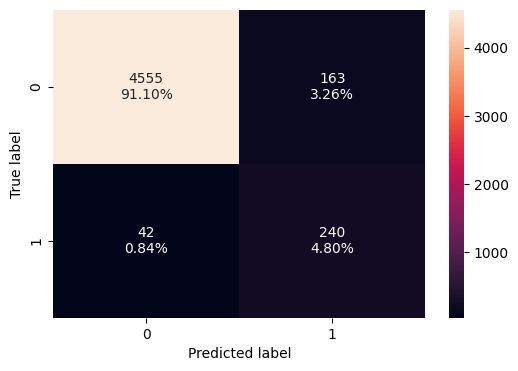

In [ ]:
# Confusion Matrix for Test performance
confusion_matrix_sklearn(GBM_Oversampled, X_test, y_test)

The model overfits the train data in relation to the test data therefore it is not suitable for production

#### Tuned AdaBoost on under sampled data

In [ ]:
# Checking performance on Train data
AdaBoostunder_tuned_train_performance = model_performance_classification_sklearn(AdaBoostunder_tuned, X_train_un, y_train_un)
AdaBoostunder_tuned_train_performance

Accuracy   Recall  Precision        F1
0  0.956081  0.92455   0.986779  0.954651

In [ ]:
# Checking performance on validation data
AdaBoostunder_tuned_val_performance = model_performance_classification_sklearn(AdaBoostunder_tuned, X_val, y_val)
AdaBoostunder_tuned_val_performance

Accuracy    Recall  Precision        F1
0   0.93575  0.887387   0.459207  0.605223

In [ ]:
# Checking performance on Test data
AdaBoostunder_tuned_test_performance = model_performance_classification_sklearn(AdaBoostunder_tuned, X_test, y_test)
AdaBoostunder_tuned_test_performance

Accuracy    Recall  Precision        F1
0    0.9376  0.875887   0.471374  0.612903

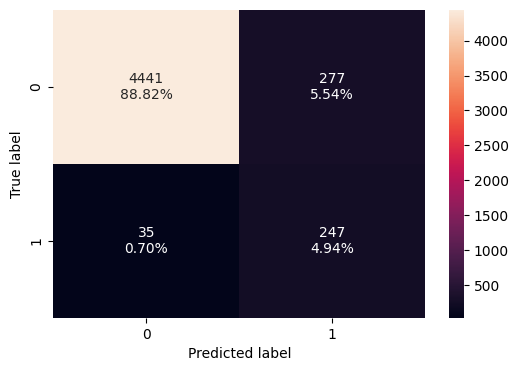

In [ ]:
# Confusion Matrix for Test performance
confusion_matrix_sklearn(AdaBoostunder_tuned, X_test, y_test)

The Tuned AdaBoost model trained on Under Sampled data is the best model given that it is not overfitting the Train data in relation to the test data. This is the model suitable for Production

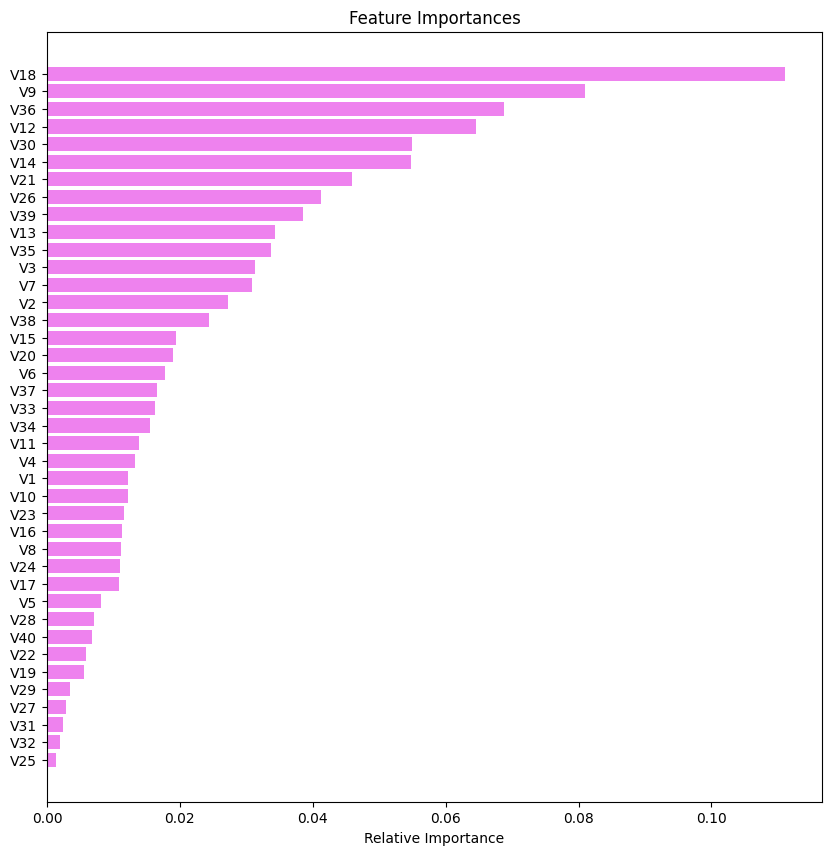

In [ ]:
# Getting the important features used for prediction in the AdaBoostunder_tuned model
importances = AdaBoostunder_tuned.feature_importances_
indices = np.argsort(importances)
features = list(X_train_un.columns)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Pipelines to build the final model


In [ ]:
# Defining the pipe
pipe = make_pipeline((SimpleImputer(missing_values = np.nan, strategy='median')),(RandomUnderSampler(random_state=1, sampling_strategy=1)),
                     (AdaBoostClassifier(n_estimators= 200, learning_rate= 0.2, estimator= DecisionTreeClassifier(max_depth=3,
                                                                      random_state=1))))
pipe.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('randomundersampler',
  RandomUnderSampler(random_state=1, sampling_strategy=1)),
 ('adaboostclassifier',
  AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                      random_state=1),
                     learning_rate=0.2, n_estimators=200))]

In [ ]:
# Trainin the model with Train data
pipe.fit(X_train, y_train)

# Printing the performance on Train data
print("Train Performance:")
# Using predict to get predicted values and then pass them to recall_score
print(recall_score(y_train, pipe.predict(X_train)),'\n')
print('-'*40)
# Printing the performance on unseen data
print("\nTest Performance:")
# Using predict to get predicted values and then pass them to recall_score
print(recall_score(y_test, pipe.predict(X_test)),'\n')

Train Performance:
0.9245495495495496 

----------------------------------------

Test Performance:
0.875886524822695 



# Business Insights and Conclusions

#### Conclusions

* The predictors V18, V9, V36, V12, V30, V14, V21, V26, V39 and V13 were the most important features in predicting whether or not a generator was at risk of Failure.

* There was very high correlation among majority of the predictors.

* The final predictor model has a tendency to predict healthy generators as failed.

#### Business Insights

* The important features should be tracked robustly to always be able to continously predict the generators under the highest risk of failuer so as to inspect them regularly and quickly arrange for repairs in the event that damage is detected.

* Onsight Engineers should be recruited so that the time between the model predicting a potential failured generator and actual inspection and repair is significantly reduced. This will lessen the risk of generator failure escalation.

* The model should frequently be deployed on new data from the sensors so that detection of potential failure is early and managed quickly thus reducing scrap material in event generators are replaced.

* The use of the predictive model not only reduces the cost of maintance of the Wind Turbines but also improves the environmental sustainability of these wind turbines by reducing waste generated from replacing generators.

***